# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
# Seed all parameters to ensure repeatability
seed_everything()

In [3]:
# Read in our data file
df = pd.read_csv('C-C Coupling Training.csv')

In [4]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,0.14972
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,0.20088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.25629
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,0.10082
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,0.10921
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.25777


In [5]:
df.shape

(64, 55)

In [6]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [7]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [8]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [10]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735937,2.735937,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.081561
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.097467
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.130060
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.030540
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.092860
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.143510
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.257770


# 2. Normalizing and Creating Dummy Variables

In [11]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [12]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [13]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [15]:
final_df = df

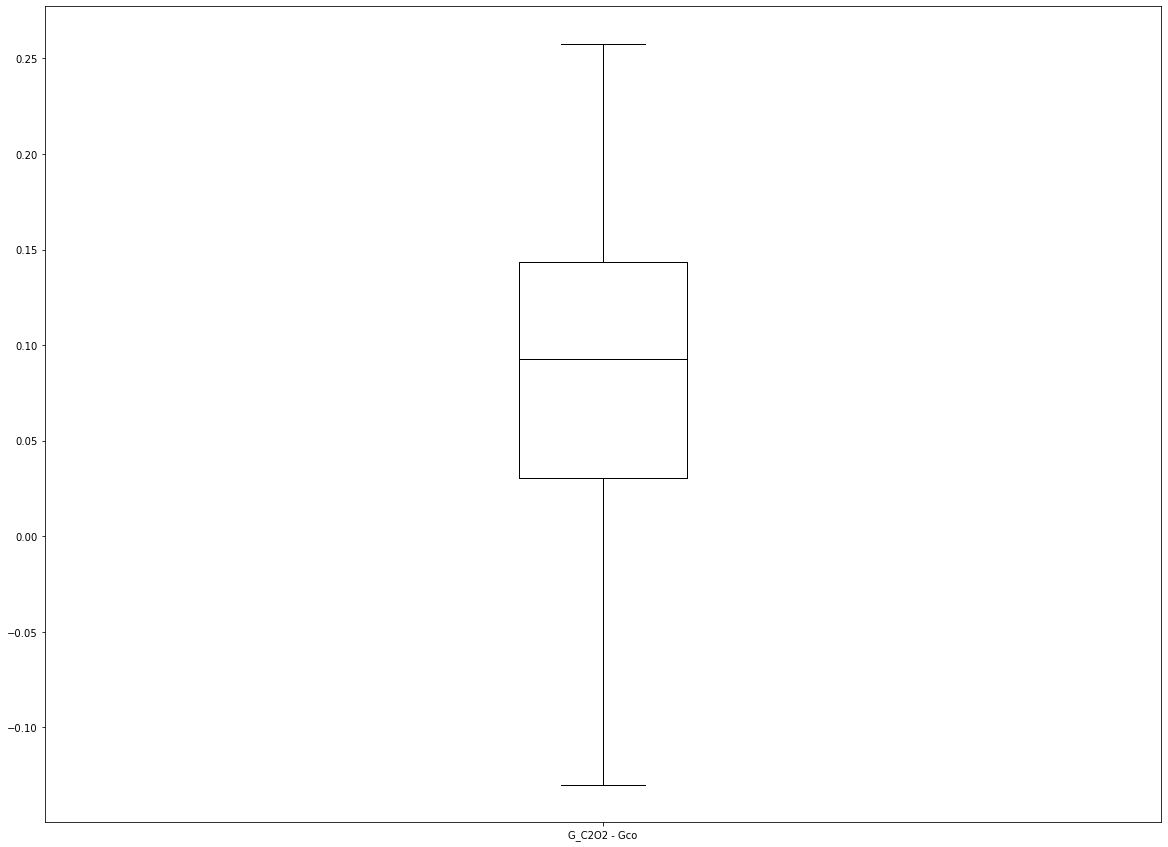

In [16]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_C2O2 - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [18]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [19]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 42 seconds


In [20]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"


### Feature Importance

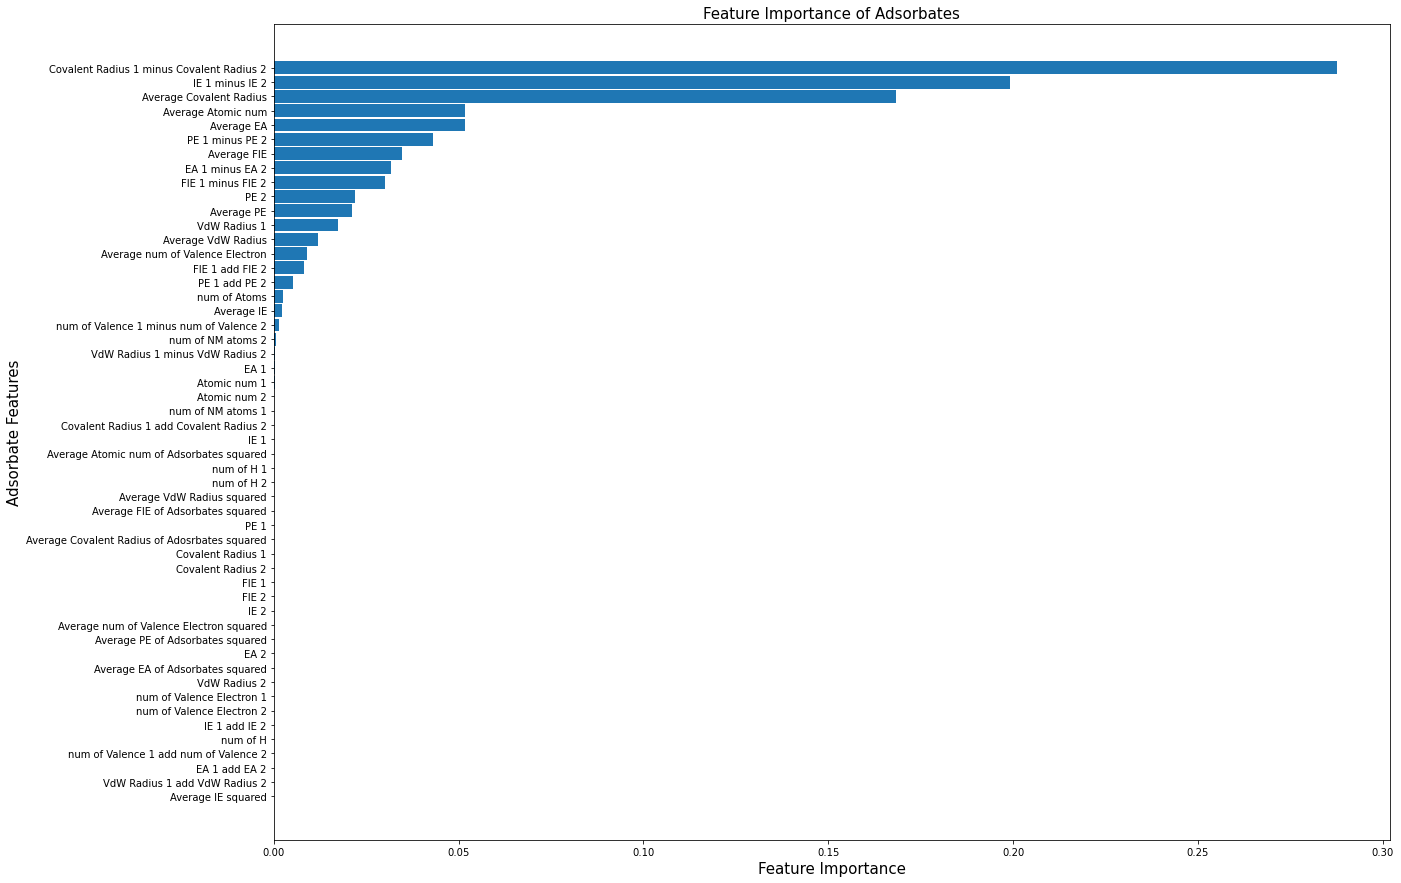

In [21]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

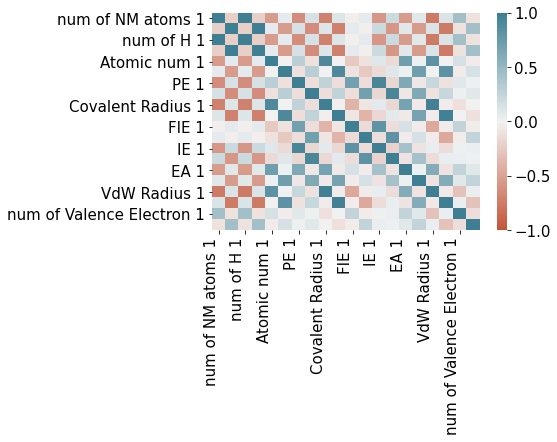

In [22]:
pearson_correlation(final_df)

## Round 2

In [23]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [24]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [25]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 43 seconds


In [26]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"


### Feature Importance and Correlation (Round 2)

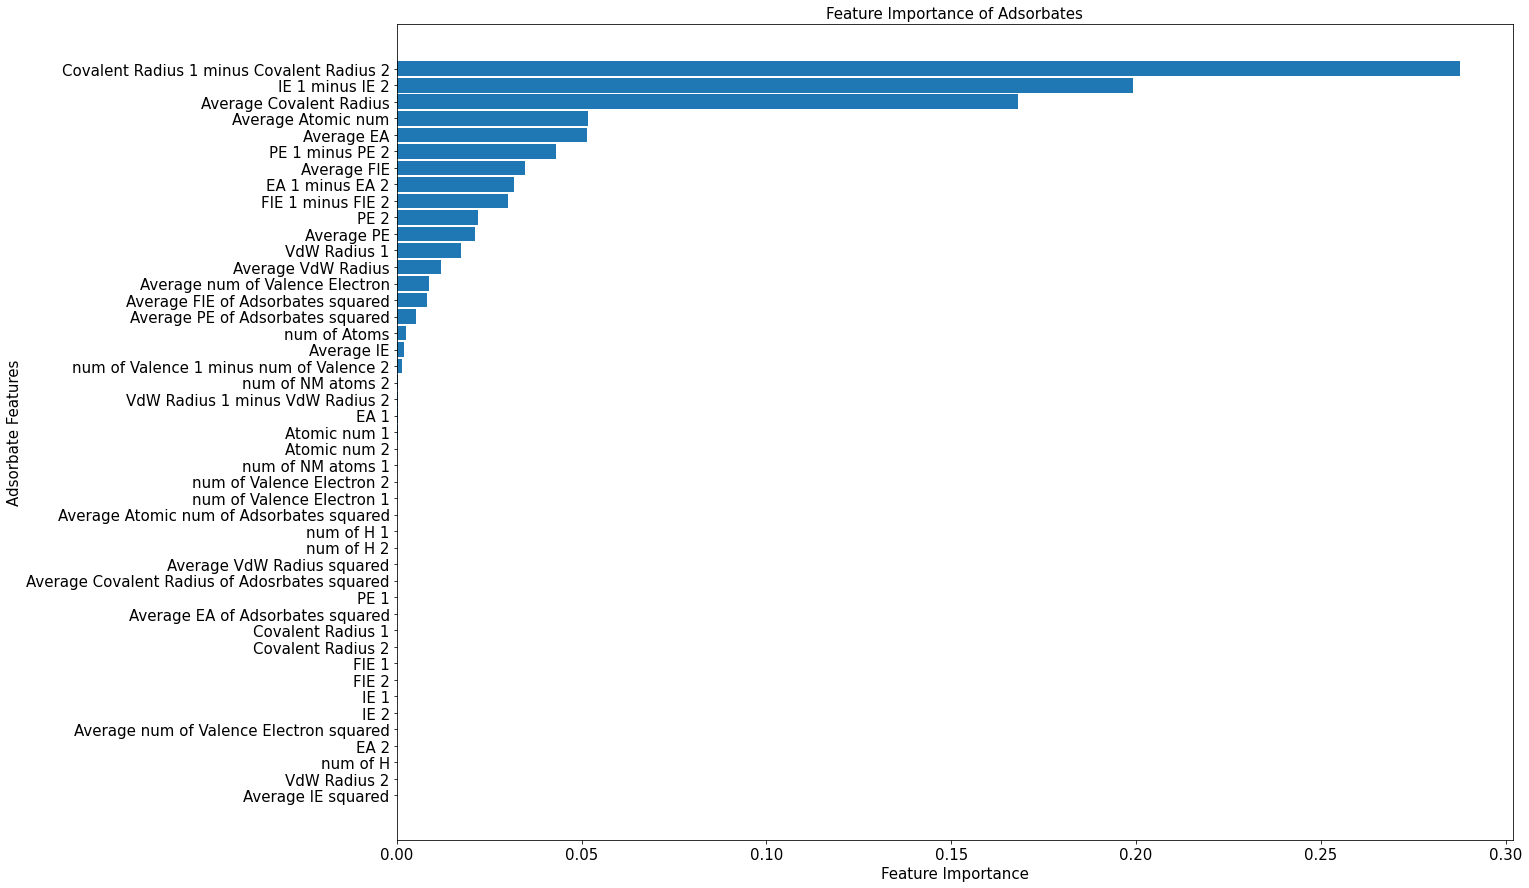

In [27]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [28]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [29]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [30]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 41 seconds


In [31]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"


### Feature Importance and Correlation (Round 3)

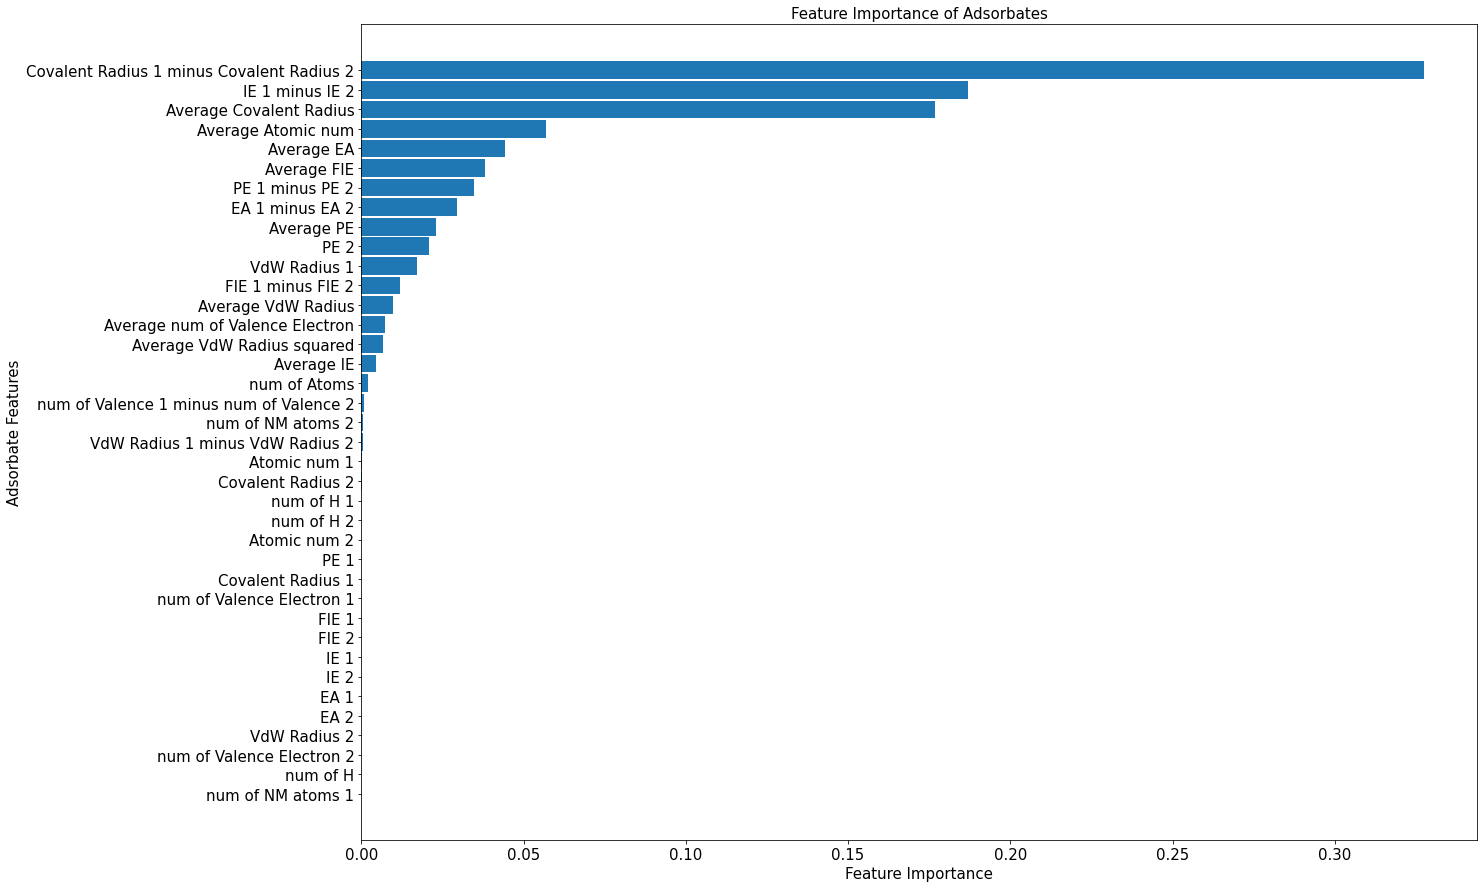

In [32]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [33]:
df_v4 = df_v3.copy()

In [34]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [35]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 39 seconds


In [36]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"
4,"[0.0218, 0.0356]","[0.0643, 0.076]","[0.0449, 0.0576]","[0.0733, 0.0864]","[0.0724, 0.0897]","[0.0253, 0.0408]","[0.0558, 0.0655]"


### Feature Importance and Correlation (Round 4)

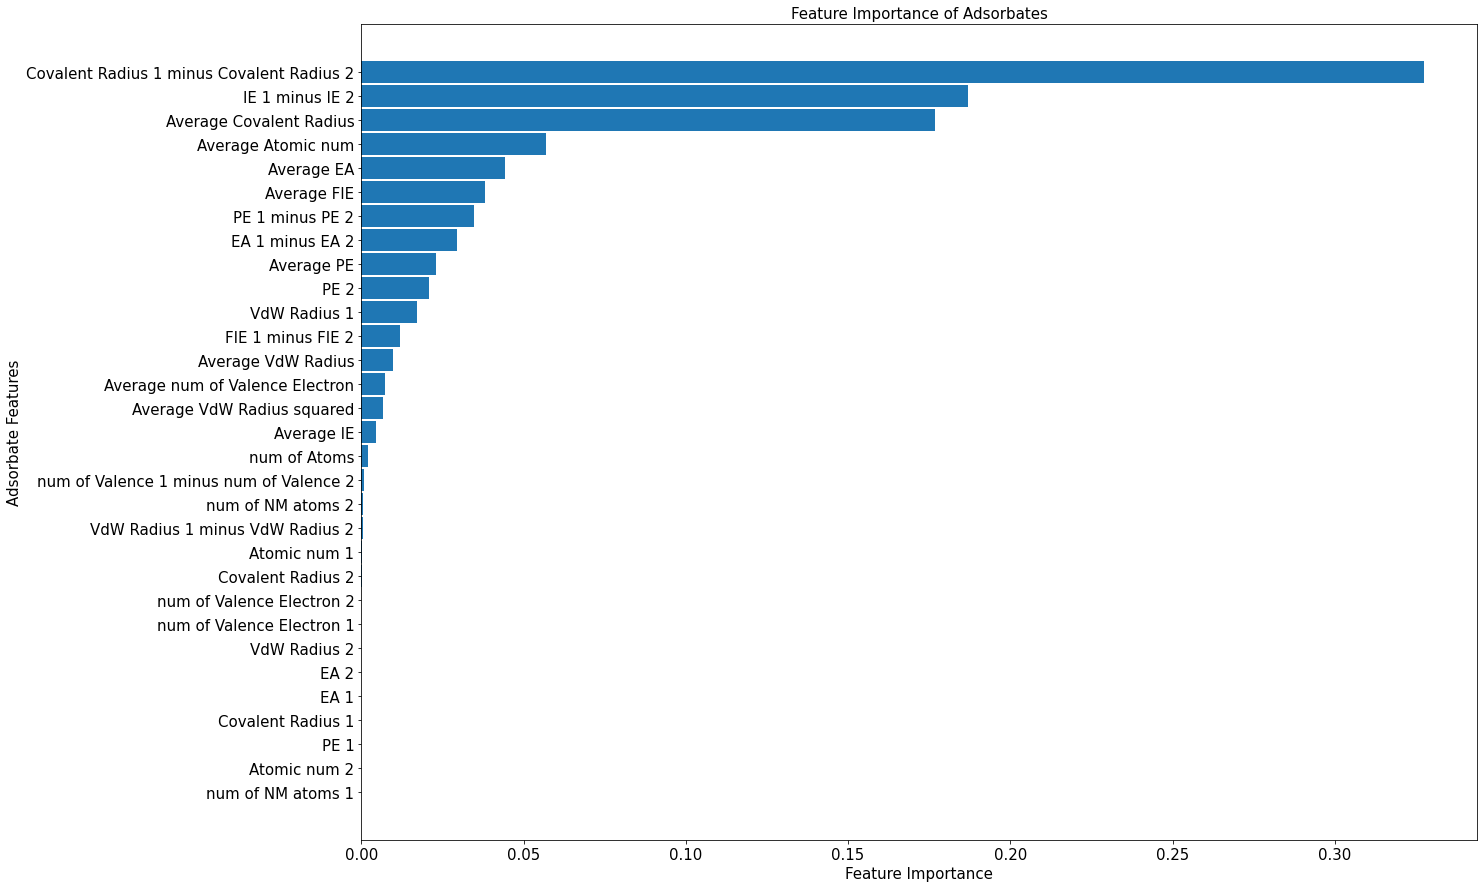

In [37]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [38]:
df_v5 = df_v4.copy()

In [39]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius squared', 'VdW Radius 1 minus VdW Radius 2',
       'Average IE', 'EA 1 minus EA 2'])

In [40]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 33 seconds


In [41]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"
4,"[0.0218, 0.0356]","[0.0643, 0.076]","[0.0449, 0.0576]","[0.0733, 0.0864]","[0.0724, 0.0897]","[0.0253, 0.0408]","[0.0558, 0.0655]"
5,"[0.0162, 0.0293]","[0.061, 0.0753]","[0.0348, 0.0457]","[0.0707, 0.0814]","[0.0669, 0.082]","[0.0156, 0.03]","[0.0543, 0.064]"


### Feature Importance and Correlation (Round 5)

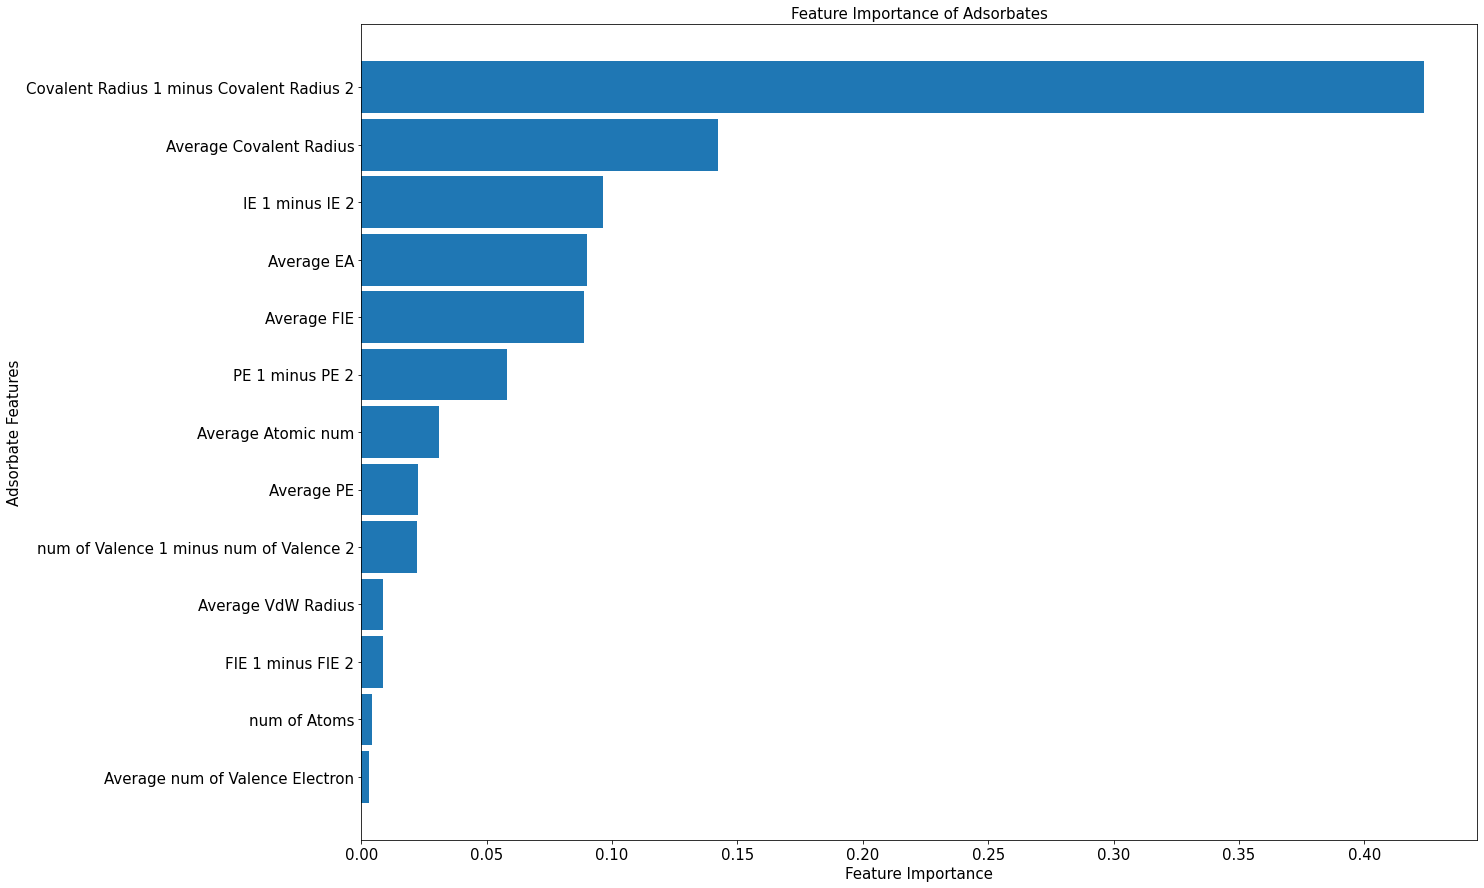

In [42]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

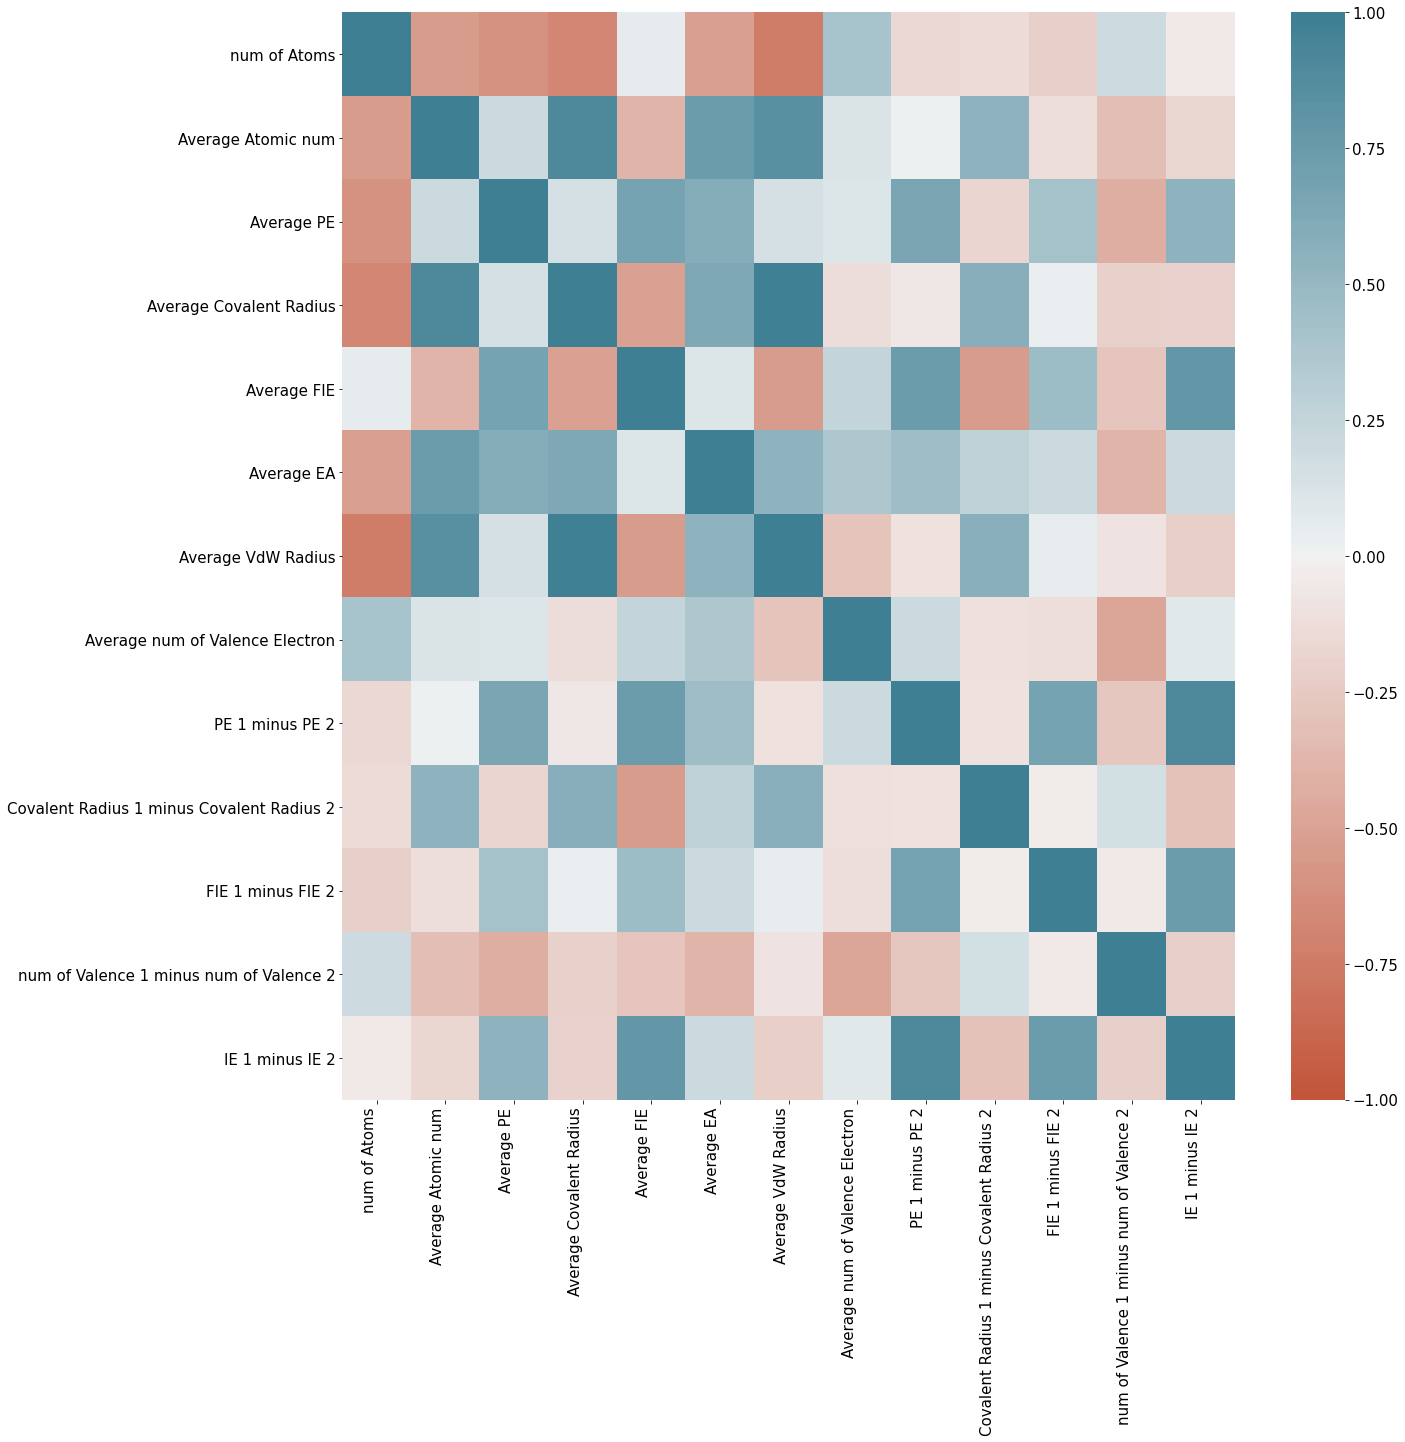

In [43]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [45]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [46]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [48]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [49]:
#xgbr_grid_cv.fit(features, target)

In [50]:
#xgbr_grid_cv.best_params_

In [51]:
#xgbr_grid_cv.best_score_

In [52]:
#xgbr_grid_cv.best_estimator_

In [53]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=5,
             monotone_constraints='()', n_estimators=300,
             n_jobs=12, num_parallel_tree=1, random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [54]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [55]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.030774615000855342, 0.015818217841009587)

# 5. Different Separation Ratios

In [68]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [69]:
r2_results

[0.425817197146446,
 0.5656824772217841,
 0.6188142528358489,
 0.708095433614658,
 0.6599066446613387,
 0.8445165904732236,
 0.9210014400326163,
 0.8617902575562963,
 0.9544740083131642]

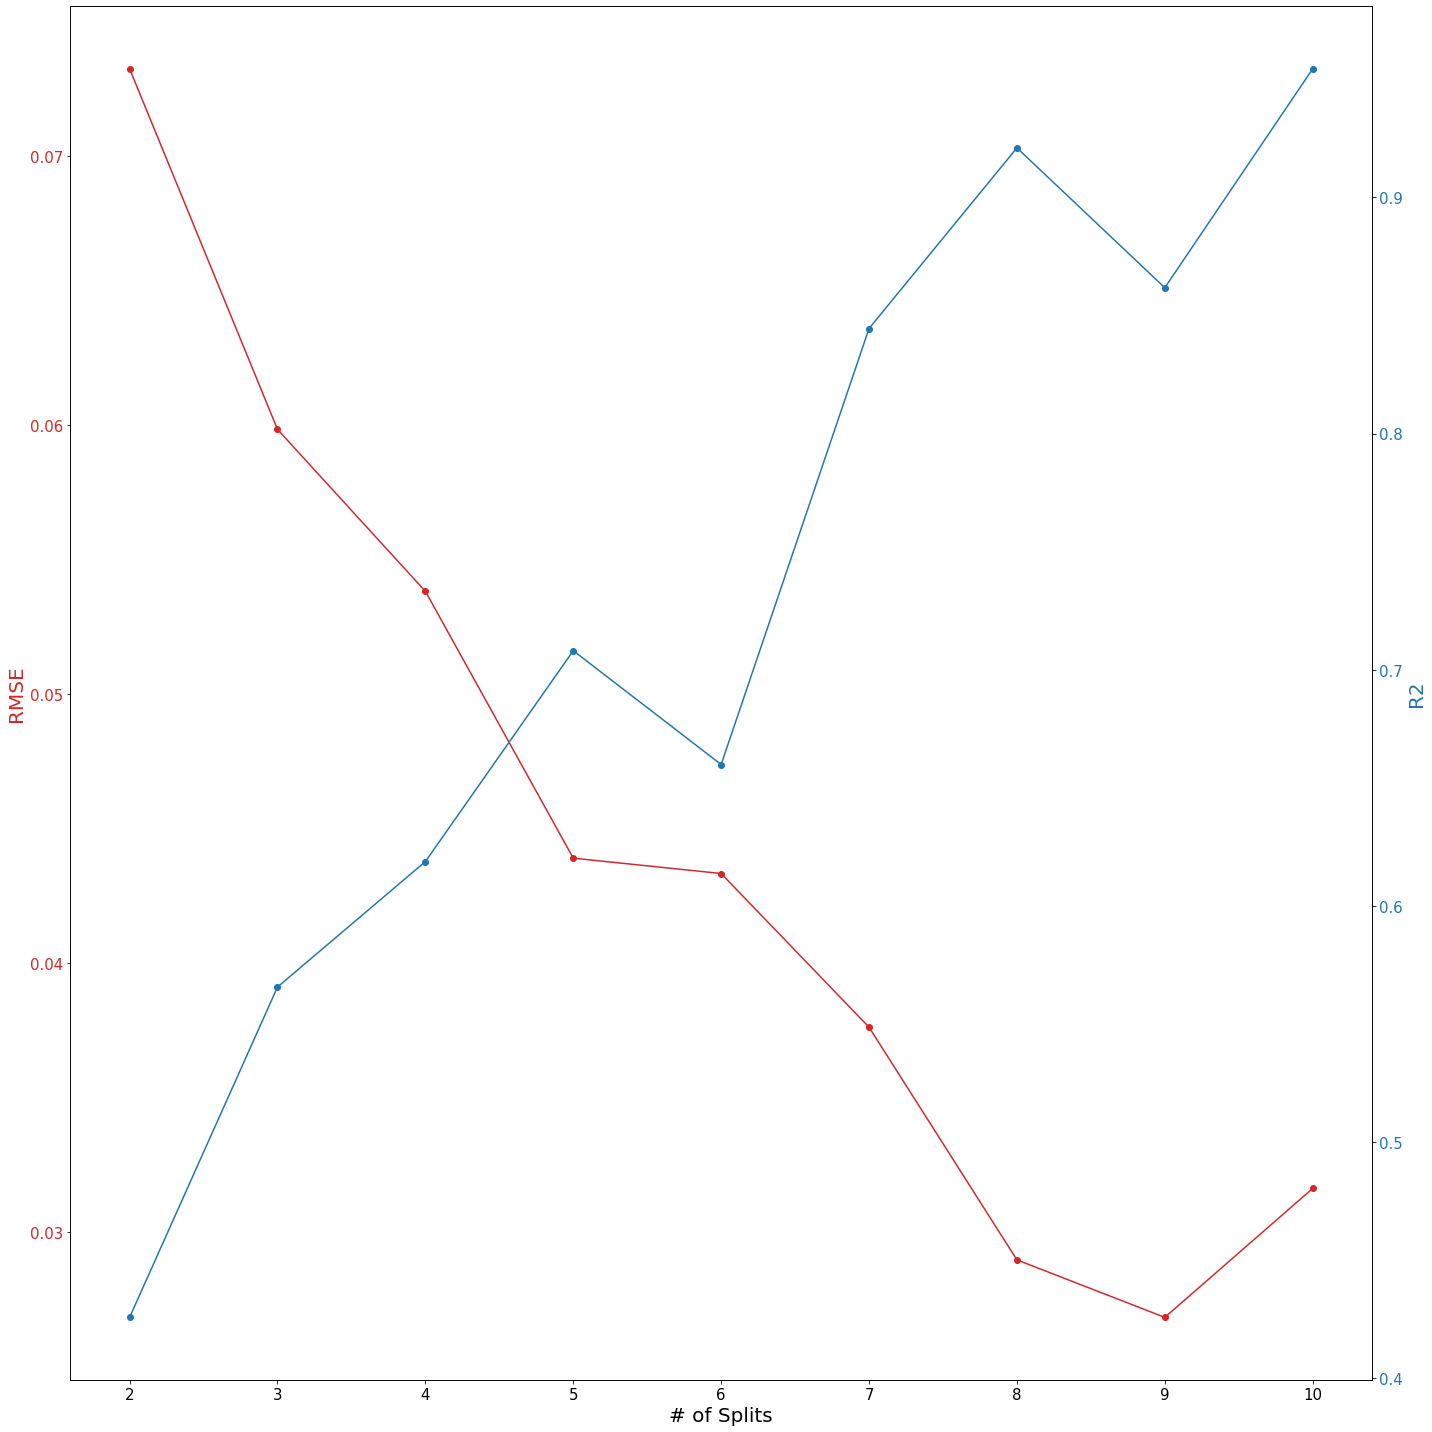

In [70]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [71]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [72]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 804ms/step - loss: 0.1482 - val_loss: 0.0859

Epoch 00001: val_loss improved from inf to 0.08594, saving model to model_best_weights.h5
Epoch 2/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.1459 - val_loss: 0.0855

Epoch 00002: val_loss improved from 0.08594 to 0.08549, saving model to model_best_weights.h5
Epoch 3/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1343 - val_loss: 0.0851

Epoch 00003: val_loss improved from 0.08549 to 0.08514, saving model to model_best_weights.h5
Epoch 4/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.1311 - val_loss: 0.0848

Epoch 00004: val_loss improved from 0.08514 to 0.08475, saving model to model_best_weights.h5
Epoch 5/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1276 - val_loss: 0.0844

Epoch 00005: val_loss improved from 0.08475 to 0.08443, saving model to model_best_weights.h5
Epoch 6/1600
1/1 [===============

1/1 [==============================] - 0s 25ms/step - loss: 0.0877 - val_loss: 0.0651

Epoch 00043: val_loss improved from 0.06645 to 0.06514, saving model to model_best_weights.h5
Epoch 44/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0906 - val_loss: 0.0654

Epoch 00044: val_loss did not improve from 0.06514
Epoch 45/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0907 - val_loss: 0.0643

Epoch 00045: val_loss improved from 0.06514 to 0.06435, saving model to model_best_weights.h5
Epoch 46/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0895 - val_loss: 0.0634

Epoch 00046: val_loss improved from 0.06435 to 0.06344, saving model to model_best_weights.h5
Epoch 47/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0823 - val_loss: 0.0619

Epoch 00047: val_loss improved from 0.06344 to 0.06190, saving model to model_best_weights.h5
Epoch 48/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0812 -

1/1 [==============================] - 0s 23ms/step - loss: 0.0686 - val_loss: 0.0466

Epoch 00093: val_loss did not improve from 0.03428
Epoch 94/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0690 - val_loss: 0.0473

Epoch 00094: val_loss did not improve from 0.03428
Epoch 95/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0689 - val_loss: 0.0543

Epoch 00095: val_loss did not improve from 0.03428
Epoch 96/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0731 - val_loss: 0.0606

Epoch 00096: val_loss did not improve from 0.03428
Epoch 97/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0509 - val_loss: 0.0678

Epoch 00097: val_loss did not improve from 0.03428
Epoch 98/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0613 - val_loss: 0.0606

Epoch 00098: val_loss did not improve from 0.03428
Epoch 99/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0729 - val_loss: 0.0513

E

1/1 [==============================] - 0s 24ms/step - loss: 0.0688 - val_loss: 0.0474

Epoch 00147: val_loss did not improve from 0.03428
Epoch 148/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0626 - val_loss: 0.0537

Epoch 00148: val_loss did not improve from 0.03428
Epoch 149/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0543 - val_loss: 0.0592

Epoch 00149: val_loss did not improve from 0.03428
Epoch 150/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0615 - val_loss: 0.0619

Epoch 00150: val_loss did not improve from 0.03428
Epoch 151/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0598 - val_loss: 0.0594

Epoch 00151: val_loss did not improve from 0.03428
Epoch 152/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0556 - val_loss: 0.0554

Epoch 00152: val_loss did not improve from 0.03428
Epoch 153/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0594 - val_loss: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.0462 - val_loss: 0.0364

Epoch 00200: val_loss did not improve from 0.02448
Epoch 201/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0636 - val_loss: 0.0375

Epoch 00201: val_loss did not improve from 0.02448
Epoch 202/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0492 - val_loss: 0.0376

Epoch 00202: val_loss did not improve from 0.02448
Epoch 203/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - val_loss: 0.0380

Epoch 00203: val_loss did not improve from 0.02448
Epoch 204/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0500 - val_loss: 0.0358

Epoch 00204: val_loss did not improve from 0.02448
Epoch 205/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0654 - val_loss: 0.0357

Epoch 00205: val_loss did not improve from 0.02448
Epoch 206/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0520 - val_loss: 0.0


Epoch 00253: val_loss did not improve from 0.02448
Epoch 254/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0433 - val_loss: 0.0306

Epoch 00254: val_loss did not improve from 0.02448
Epoch 255/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0565 - val_loss: 0.0350

Epoch 00255: val_loss did not improve from 0.02448
Epoch 256/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0468 - val_loss: 0.0379

Epoch 00256: val_loss did not improve from 0.02448
Epoch 257/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0507 - val_loss: 0.0391

Epoch 00257: val_loss did not improve from 0.02448
Epoch 258/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0462 - val_loss: 0.0390

Epoch 00258: val_loss did not improve from 0.02448
Epoch 259/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0470 - val_loss: 0.0340

Epoch 00259: val_loss did not improve from 0.02448
Epoch 260/1600
1/1 [==========

1/1 [==============================] - 0s 24ms/step - loss: 0.0584 - val_loss: 0.0337

Epoch 00306: val_loss did not improve from 0.02136
Epoch 307/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0534 - val_loss: 0.0342

Epoch 00307: val_loss did not improve from 0.02136
Epoch 308/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0613 - val_loss: 0.0328

Epoch 00308: val_loss did not improve from 0.02136
Epoch 309/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0408 - val_loss: 0.0333

Epoch 00309: val_loss did not improve from 0.02136
Epoch 310/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0461 - val_loss: 0.0321

Epoch 00310: val_loss did not improve from 0.02136
Epoch 311/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0588 - val_loss: 0.0313

Epoch 00311: val_loss did not improve from 0.02136
Epoch 312/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0457 - val_loss: 0.0

1/1 [==============================] - 0s 24ms/step - loss: 0.0576 - val_loss: 0.0289

Epoch 00359: val_loss did not improve from 0.01710
Epoch 360/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0473 - val_loss: 0.0315

Epoch 00360: val_loss did not improve from 0.01710
Epoch 361/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0506 - val_loss: 0.0332

Epoch 00361: val_loss did not improve from 0.01710
Epoch 362/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0527 - val_loss: 0.0328

Epoch 00362: val_loss did not improve from 0.01710
Epoch 363/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0456 - val_loss: 0.0340

Epoch 00363: val_loss did not improve from 0.01710
Epoch 364/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0408 - val_loss: 0.0355

Epoch 00364: val_loss did not improve from 0.01710
Epoch 365/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0582 - val_loss: 0.0

1/1 [==============================] - 0s 26ms/step - loss: 0.0445 - val_loss: 0.0264

Epoch 00412: val_loss did not improve from 0.01632
Epoch 413/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0493 - val_loss: 0.0252

Epoch 00413: val_loss did not improve from 0.01632
Epoch 414/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0422 - val_loss: 0.0240

Epoch 00414: val_loss did not improve from 0.01632
Epoch 415/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0431 - val_loss: 0.0232

Epoch 00415: val_loss did not improve from 0.01632
Epoch 416/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0478 - val_loss: 0.0234

Epoch 00416: val_loss did not improve from 0.01632
Epoch 417/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0364 - val_loss: 0.0238

Epoch 00417: val_loss did not improve from 0.01632
Epoch 418/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0496 - val_loss: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.0447 - val_loss: 0.0412

Epoch 00465: val_loss did not improve from 0.01599
Epoch 466/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0462 - val_loss: 0.0440

Epoch 00466: val_loss did not improve from 0.01599
Epoch 467/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0496 - val_loss: 0.0435

Epoch 00467: val_loss did not improve from 0.01599
Epoch 468/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0452 - val_loss: 0.0418

Epoch 00468: val_loss did not improve from 0.01599
Epoch 469/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0581 - val_loss: 0.0412

Epoch 00469: val_loss did not improve from 0.01599
Epoch 470/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.0389

Epoch 00470: val_loss did not improve from 0.01599
Epoch 471/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0480 - val_loss: 0.0

1/1 [==============================] - 0s 24ms/step - loss: 0.0514 - val_loss: 0.0290

Epoch 00518: val_loss did not improve from 0.01492
Epoch 519/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0524 - val_loss: 0.0288

Epoch 00519: val_loss did not improve from 0.01492
Epoch 520/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0460 - val_loss: 0.0278

Epoch 00520: val_loss did not improve from 0.01492
Epoch 521/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0549 - val_loss: 0.0258

Epoch 00521: val_loss did not improve from 0.01492
Epoch 522/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0420 - val_loss: 0.0273

Epoch 00522: val_loss did not improve from 0.01492
Epoch 523/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0516 - val_loss: 0.0262

Epoch 00523: val_loss did not improve from 0.01492
Epoch 524/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0

1/1 [==============================] - 0s 24ms/step - loss: 0.0349 - val_loss: 0.0178

Epoch 00571: val_loss did not improve from 0.01423
Epoch 572/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0448 - val_loss: 0.0218

Epoch 00572: val_loss did not improve from 0.01423
Epoch 573/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0436 - val_loss: 0.0268

Epoch 00573: val_loss did not improve from 0.01423
Epoch 574/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0427 - val_loss: 0.0214

Epoch 00574: val_loss did not improve from 0.01423
Epoch 575/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0451 - val_loss: 0.0167

Epoch 00575: val_loss did not improve from 0.01423
Epoch 576/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0416 - val_loss: 0.0161

Epoch 00576: val_loss did not improve from 0.01423
Epoch 577/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0391 - val_loss: 0.0


Epoch 00624: val_loss did not improve from 0.01423
Epoch 625/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0411 - val_loss: 0.0261

Epoch 00625: val_loss did not improve from 0.01423
Epoch 626/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0489 - val_loss: 0.0230

Epoch 00626: val_loss did not improve from 0.01423
Epoch 627/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0402 - val_loss: 0.0181

Epoch 00627: val_loss did not improve from 0.01423
Epoch 628/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0418 - val_loss: 0.0176

Epoch 00628: val_loss did not improve from 0.01423
Epoch 629/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0432 - val_loss: 0.0165

Epoch 00629: val_loss did not improve from 0.01423
Epoch 630/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0371 - val_loss: 0.0167

Epoch 00630: val_loss did not improve from 0.01423
Epoch 631/1600
1/1 [==========

Epoch 678/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0365 - val_loss: 0.0160

Epoch 00678: val_loss did not improve from 0.01307
Epoch 679/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0504 - val_loss: 0.0126

Epoch 00679: val_loss improved from 0.01307 to 0.01265, saving model to model_best_weights.h5
Epoch 680/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0381 - val_loss: 0.0130

Epoch 00680: val_loss did not improve from 0.01265
Epoch 681/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0449 - val_loss: 0.0122

Epoch 00681: val_loss improved from 0.01265 to 0.01223, saving model to model_best_weights.h5
Epoch 682/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0380 - val_loss: 0.0125

Epoch 00682: val_loss did not improve from 0.01223
Epoch 683/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0537 - val_loss: 0.0163

Epoch 00683: val_loss did not improve from 0.01

1/1 [==============================] - 0s 24ms/step - loss: 0.0366 - val_loss: 0.0245

Epoch 00731: val_loss did not improve from 0.01192
Epoch 732/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0430 - val_loss: 0.0256

Epoch 00732: val_loss did not improve from 0.01192
Epoch 733/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0398 - val_loss: 0.0256

Epoch 00733: val_loss did not improve from 0.01192
Epoch 734/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0390 - val_loss: 0.0252

Epoch 00734: val_loss did not improve from 0.01192
Epoch 735/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0357 - val_loss: 0.0230

Epoch 00735: val_loss did not improve from 0.01192
Epoch 736/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0417 - val_loss: 0.0225

Epoch 00736: val_loss did not improve from 0.01192
Epoch 737/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0


Epoch 00784: val_loss did not improve from 0.01192
Epoch 785/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0564 - val_loss: 0.0271

Epoch 00785: val_loss did not improve from 0.01192
Epoch 786/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0396 - val_loss: 0.0235

Epoch 00786: val_loss did not improve from 0.01192
Epoch 787/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0449 - val_loss: 0.0223

Epoch 00787: val_loss did not improve from 0.01192
Epoch 788/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0463 - val_loss: 0.0170

Epoch 00788: val_loss did not improve from 0.01192
Epoch 789/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0434 - val_loss: 0.0158

Epoch 00789: val_loss did not improve from 0.01192
Epoch 790/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0431 - val_loss: 0.0168

Epoch 00790: val_loss did not improve from 0.01192
Epoch 791/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0433 - val_loss: 0.0076

Epoch 00838: val_loss improved from 0.01192 to 0.00761, saving model to model_best_weights.h5
Epoch 839/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0415 - val_loss: 0.0064

Epoch 00839: val_loss improved from 0.00761 to 0.00637, saving model to model_best_weights.h5
Epoch 840/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0422 - val_loss: 0.0071

Epoch 00840: val_loss did not improve from 0.00637
Epoch 841/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0392 - val_loss: 0.0120

Epoch 00841: val_loss did not improve from 0.00637
Epoch 842/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0547 - val_loss: 0.0156

Epoch 00842: val_loss did not improve from 0.00637
Epoch 843/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0187

Epoch 00843: val_loss did not improve from 0.00637
Epoch 844/1

1/1 [==============================] - 0s 24ms/step - loss: 0.0356 - val_loss: 0.0260

Epoch 00891: val_loss did not improve from 0.00637
Epoch 892/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0495 - val_loss: 0.0295

Epoch 00892: val_loss did not improve from 0.00637
Epoch 893/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0379 - val_loss: 0.0304

Epoch 00893: val_loss did not improve from 0.00637
Epoch 894/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0387 - val_loss: 0.0296

Epoch 00894: val_loss did not improve from 0.00637
Epoch 895/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0604 - val_loss: 0.0251

Epoch 00895: val_loss did not improve from 0.00637
Epoch 896/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0548 - val_loss: 0.0216

Epoch 00896: val_loss did not improve from 0.00637
Epoch 897/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0403 - val_loss: 0.0


Epoch 00944: val_loss did not improve from 0.00637
Epoch 945/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0378 - val_loss: 0.0136

Epoch 00945: val_loss did not improve from 0.00637
Epoch 946/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0292 - val_loss: 0.0143

Epoch 00946: val_loss did not improve from 0.00637
Epoch 947/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0464 - val_loss: 0.0141

Epoch 00947: val_loss did not improve from 0.00637
Epoch 948/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - val_loss: 0.0141

Epoch 00948: val_loss did not improve from 0.00637
Epoch 949/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0355 - val_loss: 0.0177

Epoch 00949: val_loss did not improve from 0.00637
Epoch 950/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0514 - val_loss: 0.0167

Epoch 00950: val_loss did not improve from 0.00637
Epoch 951/1600
1/1 [==========

1/1 [==============================] - 0s 27ms/step - loss: 0.0391 - val_loss: 0.0134

Epoch 00998: val_loss did not improve from 0.00637
Epoch 999/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0438 - val_loss: 0.0121

Epoch 00999: val_loss did not improve from 0.00637
Epoch 1000/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0471 - val_loss: 0.0132

Epoch 01000: val_loss did not improve from 0.00637
Epoch 1001/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0413 - val_loss: 0.0138

Epoch 01001: val_loss did not improve from 0.00637
Epoch 1002/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0381 - val_loss: 0.0133

Epoch 01002: val_loss did not improve from 0.00637
Epoch 1003/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0353 - val_loss: 0.0126

Epoch 01003: val_loss did not improve from 0.00637
Epoch 1004/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0529 - val_loss

1/1 [==============================] - 0s 25ms/step - loss: 0.0385 - val_loss: 0.0241

Epoch 01051: val_loss did not improve from 0.00637
Epoch 1052/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0410 - val_loss: 0.0262

Epoch 01052: val_loss did not improve from 0.00637
Epoch 1053/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0377 - val_loss: 0.0266

Epoch 01053: val_loss did not improve from 0.00637
Epoch 1054/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0435 - val_loss: 0.0279

Epoch 01054: val_loss did not improve from 0.00637
Epoch 1055/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - val_loss: 0.0262

Epoch 01055: val_loss did not improve from 0.00637
Epoch 1056/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0359 - val_loss: 0.0227

Epoch 01056: val_loss did not improve from 0.00637
Epoch 1057/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0373 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0393 - val_loss: 0.0331

Epoch 01104: val_loss did not improve from 0.00637
Epoch 1105/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0347 - val_loss: 0.0312

Epoch 01105: val_loss did not improve from 0.00637
Epoch 1106/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0480 - val_loss: 0.0285

Epoch 01106: val_loss did not improve from 0.00637
Epoch 1107/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0346 - val_loss: 0.0233

Epoch 01107: val_loss did not improve from 0.00637
Epoch 1108/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0355 - val_loss: 0.0169

Epoch 01108: val_loss did not improve from 0.00637
Epoch 1109/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0398 - val_loss: 0.0139

Epoch 01109: val_loss did not improve from 0.00637
Epoch 1110/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0437 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0431 - val_loss: 0.0262

Epoch 01157: val_loss did not improve from 0.00637
Epoch 1158/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0422 - val_loss: 0.0241

Epoch 01158: val_loss did not improve from 0.00637
Epoch 1159/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0476 - val_loss: 0.0228

Epoch 01159: val_loss did not improve from 0.00637
Epoch 1160/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0376 - val_loss: 0.0200

Epoch 01160: val_loss did not improve from 0.00637
Epoch 1161/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0478 - val_loss: 0.0167

Epoch 01161: val_loss did not improve from 0.00637
Epoch 1162/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0340 - val_loss: 0.0165

Epoch 01162: val_loss did not improve from 0.00637
Epoch 1163/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0370 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - val_loss: 0.0191

Epoch 01210: val_loss did not improve from 0.00637
Epoch 1211/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0425 - val_loss: 0.0184

Epoch 01211: val_loss did not improve from 0.00637
Epoch 1212/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0347 - val_loss: 0.0187

Epoch 01212: val_loss did not improve from 0.00637
Epoch 1213/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0437 - val_loss: 0.0153

Epoch 01213: val_loss did not improve from 0.00637
Epoch 1214/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0133

Epoch 01214: val_loss did not improve from 0.00637
Epoch 1215/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0379 - val_loss: 0.0107

Epoch 01215: val_loss did not improve from 0.00637
Epoch 1216/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0515 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0421 - val_loss: 0.0194

Epoch 01263: val_loss did not improve from 0.00637
Epoch 1264/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0494 - val_loss: 0.0215

Epoch 01264: val_loss did not improve from 0.00637
Epoch 1265/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0488 - val_loss: 0.0231

Epoch 01265: val_loss did not improve from 0.00637
Epoch 1266/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0397 - val_loss: 0.0230

Epoch 01266: val_loss did not improve from 0.00637
Epoch 1267/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0514 - val_loss: 0.0234

Epoch 01267: val_loss did not improve from 0.00637
Epoch 1268/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0426 - val_loss: 0.0219

Epoch 01268: val_loss did not improve from 0.00637
Epoch 1269/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0411 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0418 - val_loss: 0.0204

Epoch 01316: val_loss did not improve from 0.00637
Epoch 1317/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - val_loss: 0.0177

Epoch 01317: val_loss did not improve from 0.00637
Epoch 1318/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0390 - val_loss: 0.0171

Epoch 01318: val_loss did not improve from 0.00637
Epoch 1319/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0527 - val_loss: 0.0170

Epoch 01319: val_loss did not improve from 0.00637
Epoch 1320/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0391 - val_loss: 0.0156

Epoch 01320: val_loss did not improve from 0.00637
Epoch 1321/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0360 - val_loss: 0.0143

Epoch 01321: val_loss did not improve from 0.00637
Epoch 1322/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0408 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0631 - val_loss: 0.0297

Epoch 01369: val_loss did not improve from 0.00637
Epoch 1370/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0435 - val_loss: 0.0279

Epoch 01370: val_loss did not improve from 0.00637
Epoch 1371/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0349 - val_loss: 0.0275

Epoch 01371: val_loss did not improve from 0.00637
Epoch 1372/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0432 - val_loss: 0.0277

Epoch 01372: val_loss did not improve from 0.00637
Epoch 1373/1600
1/1 [==============================] - 0s 21ms/step - loss: 0.0471 - val_loss: 0.0274

Epoch 01373: val_loss did not improve from 0.00637
Epoch 1374/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0397 - val_loss: 0.0242

Epoch 01374: val_loss did not improve from 0.00637
Epoch 1375/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0393 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0414 - val_loss: 0.0228

Epoch 01422: val_loss did not improve from 0.00637
Epoch 1423/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0414 - val_loss: 0.0250

Epoch 01423: val_loss did not improve from 0.00637
Epoch 1424/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0522 - val_loss: 0.0253

Epoch 01424: val_loss did not improve from 0.00637
Epoch 1425/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0456 - val_loss: 0.0250

Epoch 01425: val_loss did not improve from 0.00637
Epoch 1426/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0556 - val_loss: 0.0259

Epoch 01426: val_loss did not improve from 0.00637
Epoch 1427/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0344 - val_loss: 0.0289

Epoch 01427: val_loss did not improve from 0.00637
Epoch 1428/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0367 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0373 - val_loss: 0.0253

Epoch 01475: val_loss did not improve from 0.00637
Epoch 1476/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - val_loss: 0.0271

Epoch 01476: val_loss did not improve from 0.00637
Epoch 1477/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0412 - val_loss: 0.0283

Epoch 01477: val_loss did not improve from 0.00637
Epoch 1478/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0546 - val_loss: 0.0290

Epoch 01478: val_loss did not improve from 0.00637
Epoch 1479/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0421 - val_loss: 0.0295

Epoch 01479: val_loss did not improve from 0.00637
Epoch 1480/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0368 - val_loss: 0.0275

Epoch 01480: val_loss did not improve from 0.00637
Epoch 1481/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0432 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0413 - val_loss: 0.0184

Epoch 01528: val_loss did not improve from 0.00637
Epoch 1529/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0339 - val_loss: 0.0173

Epoch 01529: val_loss did not improve from 0.00637
Epoch 1530/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0413 - val_loss: 0.0168

Epoch 01530: val_loss did not improve from 0.00637
Epoch 1531/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0440 - val_loss: 0.0180

Epoch 01531: val_loss did not improve from 0.00637
Epoch 1532/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0451 - val_loss: 0.0180

Epoch 01532: val_loss did not improve from 0.00637
Epoch 1533/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0446 - val_loss: 0.0195

Epoch 01533: val_loss did not improve from 0.00637
Epoch 1534/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0484 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - val_loss: 0.0138

Epoch 01581: val_loss did not improve from 0.00637
Epoch 1582/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0370 - val_loss: 0.0162

Epoch 01582: val_loss did not improve from 0.00637
Epoch 1583/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0362 - val_loss: 0.0165

Epoch 01583: val_loss did not improve from 0.00637
Epoch 1584/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0368 - val_loss: 0.0170

Epoch 01584: val_loss did not improve from 0.00637
Epoch 1585/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0470 - val_loss: 0.0170

Epoch 01585: val_loss did not improve from 0.00637
Epoch 1586/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0493 - val_loss: 0.0182

Epoch 01586: val_loss did not improve from 0.00637
Epoch 1587/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0348 - val_los

In [73]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [74]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 931ms/step - loss: 0.1212 - val_loss: 0.0666

Epoch 00001: val_loss improved from inf to 0.06665, saving model to model_best_weights_mae.h5
Epoch 2/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.1157 - val_loss: 0.0663

Epoch 00002: val_loss improved from 0.06665 to 0.06626, saving model to model_best_weights_mae.h5
Epoch 3/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.1177 - val_loss: 0.0659

Epoch 00003: val_loss improved from 0.06626 to 0.06595, saving model to model_best_weights_mae.h5
Epoch 4/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1143 - val_loss: 0.0656

Epoch 00004: val_loss improved from 0.06595 to 0.06565, saving model to model_best_weights_mae.h5
Epoch 5/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.1049 - val_loss: 0.0654

Epoch 00005: val_loss improved from 0.06565 to 0.06537, saving model to model_best_weights_mae.h5
Epoch 6/1600



Epoch 00044: val_loss improved from 0.05192 to 0.05040, saving model to model_best_weights_mae.h5
Epoch 45/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0759 - val_loss: 0.0487

Epoch 00045: val_loss improved from 0.05040 to 0.04869, saving model to model_best_weights_mae.h5
Epoch 46/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0670 - val_loss: 0.0493

Epoch 00046: val_loss did not improve from 0.04869
Epoch 47/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0652 - val_loss: 0.0500

Epoch 00047: val_loss did not improve from 0.04869
Epoch 48/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0681 - val_loss: 0.0507

Epoch 00048: val_loss did not improve from 0.04869
Epoch 49/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0605 - val_loss: 0.0511

Epoch 00049: val_loss did not improve from 0.04869
Epoch 50/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0593 - val_loss: 0


Epoch 00095: val_loss did not improve from 0.03796
Epoch 96/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0573 - val_loss: 0.0508

Epoch 00096: val_loss did not improve from 0.03796
Epoch 97/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0395 - val_loss: 0.0521

Epoch 00097: val_loss did not improve from 0.03796
Epoch 98/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0400 - val_loss: 0.0493

Epoch 00098: val_loss did not improve from 0.03796
Epoch 99/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0500 - val_loss: 0.0487

Epoch 00099: val_loss did not improve from 0.03796
Epoch 100/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0473 - val_loss: 0.0465

Epoch 00100: val_loss did not improve from 0.03796
Epoch 101/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0545 - val_loss: 0.0473

Epoch 00101: val_loss did not improve from 0.03796
Epoch 102/1600
1/1 [==============

1/1 [==============================] - 0s 22ms/step - loss: 0.0477 - val_loss: 0.0363

Epoch 00148: val_loss did not improve from 0.03065
Epoch 149/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0434 - val_loss: 0.0371

Epoch 00149: val_loss did not improve from 0.03065
Epoch 150/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0429 - val_loss: 0.0359

Epoch 00150: val_loss did not improve from 0.03065
Epoch 151/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0405 - val_loss: 0.0378

Epoch 00151: val_loss did not improve from 0.03065
Epoch 152/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0421 - val_loss: 0.0417

Epoch 00152: val_loss did not improve from 0.03065
Epoch 153/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - val_loss: 0.0440

Epoch 00153: val_loss did not improve from 0.03065
Epoch 154/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0395 - val_loss: 0.0

Epoch 201/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0475 - val_loss: 0.0237

Epoch 00201: val_loss improved from 0.02490 to 0.02367, saving model to model_best_weights_mae.h5
Epoch 202/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0212

Epoch 00202: val_loss improved from 0.02367 to 0.02123, saving model to model_best_weights_mae.h5
Epoch 203/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0415 - val_loss: 0.0196

Epoch 00203: val_loss improved from 0.02123 to 0.01958, saving model to model_best_weights_mae.h5
Epoch 204/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0421 - val_loss: 0.0218

Epoch 00204: val_loss did not improve from 0.01958
Epoch 205/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0453 - val_loss: 0.0178

Epoch 00205: val_loss improved from 0.01958 to 0.01784, saving model to model_best_weights_mae.h5
Epoch 206/1600
1/1 [===========================


Epoch 00250: val_loss did not improve from 0.01060
Epoch 251/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0412 - val_loss: 0.0257

Epoch 00251: val_loss did not improve from 0.01060
Epoch 252/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - val_loss: 0.0340

Epoch 00252: val_loss did not improve from 0.01060
Epoch 253/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - val_loss: 0.0402

Epoch 00253: val_loss did not improve from 0.01060
Epoch 254/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - val_loss: 0.0252

Epoch 00254: val_loss did not improve from 0.01060
Epoch 255/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0394 - val_loss: 0.0204

Epoch 00255: val_loss did not improve from 0.01060
Epoch 256/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0356 - val_loss: 0.0205

Epoch 00256: val_loss did not improve from 0.01060
Epoch 257/1600
1/1 [==========

1/1 [==============================] - 0s 22ms/step - loss: 0.0357 - val_loss: 0.0174

Epoch 00304: val_loss did not improve from 0.01060
Epoch 305/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0350 - val_loss: 0.0164

Epoch 00305: val_loss did not improve from 0.01060
Epoch 306/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0391 - val_loss: 0.0175

Epoch 00306: val_loss did not improve from 0.01060
Epoch 307/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - val_loss: 0.0225

Epoch 00307: val_loss did not improve from 0.01060
Epoch 308/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0498 - val_loss: 0.0241

Epoch 00308: val_loss did not improve from 0.01060
Epoch 309/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0391 - val_loss: 0.0285

Epoch 00309: val_loss did not improve from 0.01060
Epoch 310/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0302 - val_loss: 0.0

1/1 [==============================] - 0s 23ms/step - loss: 0.0487 - val_loss: 0.0132

Epoch 00357: val_loss did not improve from 0.00824
Epoch 358/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0332 - val_loss: 0.0149

Epoch 00358: val_loss did not improve from 0.00824
Epoch 359/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0437 - val_loss: 0.0156

Epoch 00359: val_loss did not improve from 0.00824
Epoch 360/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0327 - val_loss: 0.0206

Epoch 00360: val_loss did not improve from 0.00824
Epoch 361/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0340 - val_loss: 0.0181

Epoch 00361: val_loss did not improve from 0.00824
Epoch 362/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0462 - val_loss: 0.0153

Epoch 00362: val_loss did not improve from 0.00824
Epoch 363/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0388 - val_loss: 0.0


Epoch 00410: val_loss did not improve from 0.00824
Epoch 411/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0334 - val_loss: 0.0268

Epoch 00411: val_loss did not improve from 0.00824
Epoch 412/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0345 - val_loss: 0.0199

Epoch 00412: val_loss did not improve from 0.00824
Epoch 413/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0343 - val_loss: 0.0161

Epoch 00413: val_loss did not improve from 0.00824
Epoch 414/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0377 - val_loss: 0.0129

Epoch 00414: val_loss did not improve from 0.00824
Epoch 415/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - val_loss: 0.0155

Epoch 00415: val_loss did not improve from 0.00824
Epoch 416/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0323 - val_loss: 0.0130

Epoch 00416: val_loss did not improve from 0.00824
Epoch 417/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0451 - val_loss: 0.0425

Epoch 00464: val_loss did not improve from 0.00824
Epoch 465/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0435 - val_loss: 0.0471

Epoch 00465: val_loss did not improve from 0.00824
Epoch 466/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0394 - val_loss: 0.0485

Epoch 00466: val_loss did not improve from 0.00824
Epoch 467/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0363 - val_loss: 0.0481

Epoch 00467: val_loss did not improve from 0.00824
Epoch 468/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0351 - val_loss: 0.0497

Epoch 00468: val_loss did not improve from 0.00824
Epoch 469/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - val_loss: 0.0514

Epoch 00469: val_loss did not improve from 0.00824
Epoch 470/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0


Epoch 00517: val_loss did not improve from 0.00824
Epoch 518/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0338 - val_loss: 0.0447

Epoch 00518: val_loss did not improve from 0.00824
Epoch 519/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0438 - val_loss: 0.0436

Epoch 00519: val_loss did not improve from 0.00824
Epoch 520/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0424 - val_loss: 0.0425

Epoch 00520: val_loss did not improve from 0.00824
Epoch 521/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0503 - val_loss: 0.0440

Epoch 00521: val_loss did not improve from 0.00824
Epoch 522/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0330 - val_loss: 0.0430

Epoch 00522: val_loss did not improve from 0.00824
Epoch 523/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0468 - val_loss: 0.0420

Epoch 00523: val_loss did not improve from 0.00824
Epoch 524/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0328 - val_loss: 0.0392

Epoch 00571: val_loss did not improve from 0.00824
Epoch 572/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - val_loss: 0.0372

Epoch 00572: val_loss did not improve from 0.00824
Epoch 573/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0361 - val_loss: 0.0354

Epoch 00573: val_loss did not improve from 0.00824
Epoch 574/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0339 - val_loss: 0.0349

Epoch 00574: val_loss did not improve from 0.00824
Epoch 575/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0357 - val_loss: 0.0350

Epoch 00575: val_loss did not improve from 0.00824
Epoch 576/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0325 - val_loss: 0.0348

Epoch 00576: val_loss did not improve from 0.00824
Epoch 577/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0306 - val_loss: 0.0


Epoch 00624: val_loss did not improve from 0.00824
Epoch 625/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0371 - val_loss: 0.0298

Epoch 00625: val_loss did not improve from 0.00824
Epoch 626/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0387 - val_loss: 0.0283

Epoch 00626: val_loss did not improve from 0.00824
Epoch 627/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - val_loss: 0.0259

Epoch 00627: val_loss did not improve from 0.00824
Epoch 628/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0378 - val_loss: 0.0253

Epoch 00628: val_loss did not improve from 0.00824
Epoch 629/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0380 - val_loss: 0.0267

Epoch 00629: val_loss did not improve from 0.00824
Epoch 630/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0301 - val_loss: 0.0280

Epoch 00630: val_loss did not improve from 0.00824
Epoch 631/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0292 - val_loss: 0.0344

Epoch 00678: val_loss did not improve from 0.00824
Epoch 679/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0326 - val_loss: 0.0367

Epoch 00679: val_loss did not improve from 0.00824
Epoch 680/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - val_loss: 0.0355

Epoch 00680: val_loss did not improve from 0.00824
Epoch 681/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0391 - val_loss: 0.0361

Epoch 00681: val_loss did not improve from 0.00824
Epoch 682/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0355 - val_loss: 0.0308

Epoch 00682: val_loss did not improve from 0.00824
Epoch 683/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0457 - val_loss: 0.0348

Epoch 00683: val_loss did not improve from 0.00824
Epoch 684/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0385 - val_loss: 0.0


Epoch 00731: val_loss did not improve from 0.00824
Epoch 732/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - val_loss: 0.0295

Epoch 00732: val_loss did not improve from 0.00824
Epoch 733/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0380 - val_loss: 0.0285

Epoch 00733: val_loss did not improve from 0.00824
Epoch 734/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0331 - val_loss: 0.0267

Epoch 00734: val_loss did not improve from 0.00824
Epoch 735/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0264 - val_loss: 0.0266

Epoch 00735: val_loss did not improve from 0.00824
Epoch 736/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0363 - val_loss: 0.0280

Epoch 00736: val_loss did not improve from 0.00824
Epoch 737/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0349 - val_loss: 0.0282

Epoch 00737: val_loss did not improve from 0.00824
Epoch 738/1600
1/1 [==========

1/1 [==============================] - 0s 22ms/step - loss: 0.0333 - val_loss: 0.0247

Epoch 00785: val_loss did not improve from 0.00824
Epoch 786/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0286 - val_loss: 0.0223

Epoch 00786: val_loss did not improve from 0.00824
Epoch 787/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0372 - val_loss: 0.0223

Epoch 00787: val_loss did not improve from 0.00824
Epoch 788/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0361 - val_loss: 0.0224

Epoch 00788: val_loss did not improve from 0.00824
Epoch 789/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0349 - val_loss: 0.0224

Epoch 00789: val_loss did not improve from 0.00824
Epoch 790/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - val_loss: 0.0234

Epoch 00790: val_loss did not improve from 0.00824
Epoch 791/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0


Epoch 00838: val_loss did not improve from 0.00824
Epoch 839/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0355 - val_loss: 0.0205

Epoch 00839: val_loss did not improve from 0.00824
Epoch 840/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0300 - val_loss: 0.0213

Epoch 00840: val_loss did not improve from 0.00824
Epoch 841/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0284 - val_loss: 0.0243

Epoch 00841: val_loss did not improve from 0.00824
Epoch 842/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0298 - val_loss: 0.0238

Epoch 00842: val_loss did not improve from 0.00824
Epoch 843/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0371 - val_loss: 0.0246

Epoch 00843: val_loss did not improve from 0.00824
Epoch 844/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0439 - val_loss: 0.0291

Epoch 00844: val_loss did not improve from 0.00824
Epoch 845/1600
1/1 [==========

1/1 [==============================] - 0s 24ms/step - loss: 0.0359 - val_loss: 0.0170

Epoch 00892: val_loss did not improve from 0.00824
Epoch 893/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0315 - val_loss: 0.0151

Epoch 00893: val_loss did not improve from 0.00824
Epoch 894/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0343 - val_loss: 0.0139

Epoch 00894: val_loss did not improve from 0.00824
Epoch 895/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0465 - val_loss: 0.0127

Epoch 00895: val_loss did not improve from 0.00824
Epoch 896/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0350 - val_loss: 0.0116

Epoch 00896: val_loss did not improve from 0.00824
Epoch 897/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0261 - val_loss: 0.0130

Epoch 00897: val_loss did not improve from 0.00824
Epoch 898/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - val_loss: 0.0


Epoch 00945: val_loss did not improve from 0.00824
Epoch 946/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0392 - val_loss: 0.0165

Epoch 00946: val_loss did not improve from 0.00824
Epoch 947/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0297 - val_loss: 0.0165

Epoch 00947: val_loss did not improve from 0.00824
Epoch 948/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0401 - val_loss: 0.0174

Epoch 00948: val_loss did not improve from 0.00824
Epoch 949/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0302 - val_loss: 0.0157

Epoch 00949: val_loss did not improve from 0.00824
Epoch 950/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0358 - val_loss: 0.0154

Epoch 00950: val_loss did not improve from 0.00824
Epoch 951/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0318 - val_loss: 0.0156

Epoch 00951: val_loss did not improve from 0.00824
Epoch 952/1600
1/1 [==========

1/1 [==============================] - 0s 25ms/step - loss: 0.0348 - val_loss: 0.0300

Epoch 00999: val_loss did not improve from 0.00824
Epoch 1000/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0388 - val_loss: 0.0305

Epoch 01000: val_loss did not improve from 0.00824
Epoch 1001/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0291 - val_loss: 0.0315

Epoch 01001: val_loss did not improve from 0.00824
Epoch 1002/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0319 - val_loss: 0.0315

Epoch 01002: val_loss did not improve from 0.00824
Epoch 1003/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0354 - val_loss: 0.0295

Epoch 01003: val_loss did not improve from 0.00824
Epoch 1004/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0342 - val_loss: 0.0255

Epoch 01004: val_loss did not improve from 0.00824
Epoch 1005/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0363 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0279 - val_loss: 0.0240

Epoch 01052: val_loss did not improve from 0.00824
Epoch 1053/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0378 - val_loss: 0.0234

Epoch 01053: val_loss did not improve from 0.00824
Epoch 1054/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0345 - val_loss: 0.0230

Epoch 01054: val_loss did not improve from 0.00824
Epoch 1055/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0363 - val_loss: 0.0234

Epoch 01055: val_loss did not improve from 0.00824
Epoch 1056/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - val_loss: 0.0238

Epoch 01056: val_loss did not improve from 0.00824
Epoch 1057/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0319 - val_loss: 0.0238

Epoch 01057: val_loss did not improve from 0.00824
Epoch 1058/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0391 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0378 - val_loss: 0.0326

Epoch 01105: val_loss did not improve from 0.00824
Epoch 1106/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0347 - val_loss: 0.0312

Epoch 01106: val_loss did not improve from 0.00824
Epoch 1107/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - val_loss: 0.0293

Epoch 01107: val_loss did not improve from 0.00824
Epoch 1108/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0293 - val_loss: 0.0255

Epoch 01108: val_loss did not improve from 0.00824
Epoch 1109/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0406 - val_loss: 0.0225

Epoch 01109: val_loss did not improve from 0.00824
Epoch 1110/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0297 - val_loss: 0.0204

Epoch 01110: val_loss did not improve from 0.00824
Epoch 1111/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0401 - val_loss: 0.0309

Epoch 01158: val_loss did not improve from 0.00824
Epoch 1159/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - val_loss: 0.0299

Epoch 01159: val_loss did not improve from 0.00824
Epoch 1160/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0301

Epoch 01160: val_loss did not improve from 0.00824
Epoch 1161/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0354 - val_loss: 0.0305

Epoch 01161: val_loss did not improve from 0.00824
Epoch 1162/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0408 - val_loss: 0.0325

Epoch 01162: val_loss did not improve from 0.00824
Epoch 1163/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - val_loss: 0.0331

Epoch 01163: val_loss did not improve from 0.00824
Epoch 1164/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0337 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0357 - val_loss: 0.0328

Epoch 01211: val_loss did not improve from 0.00824
Epoch 1212/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - val_loss: 0.0337

Epoch 01212: val_loss did not improve from 0.00824
Epoch 1213/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0330 - val_loss: 0.0340

Epoch 01213: val_loss did not improve from 0.00824
Epoch 1214/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0296 - val_loss: 0.0300

Epoch 01214: val_loss did not improve from 0.00824
Epoch 1215/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0313 - val_loss: 0.0277

Epoch 01215: val_loss did not improve from 0.00824
Epoch 1216/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0388 - val_loss: 0.0265

Epoch 01216: val_loss did not improve from 0.00824
Epoch 1217/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.0254

Epoch 01264: val_loss did not improve from 0.00824
Epoch 1265/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0448 - val_loss: 0.0233

Epoch 01265: val_loss did not improve from 0.00824
Epoch 1266/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0327 - val_loss: 0.0237

Epoch 01266: val_loss did not improve from 0.00824
Epoch 1267/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0357 - val_loss: 0.0226

Epoch 01267: val_loss did not improve from 0.00824
Epoch 1268/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0290 - val_loss: 0.0231

Epoch 01268: val_loss did not improve from 0.00824
Epoch 1269/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0395 - val_loss: 0.0240

Epoch 01269: val_loss did not improve from 0.00824
Epoch 1270/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0319 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0357 - val_loss: 0.0266

Epoch 01317: val_loss did not improve from 0.00824
Epoch 1318/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0341 - val_loss: 0.0261

Epoch 01318: val_loss did not improve from 0.00824
Epoch 1319/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - val_loss: 0.0245

Epoch 01319: val_loss did not improve from 0.00824
Epoch 1320/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0259 - val_loss: 0.0238

Epoch 01320: val_loss did not improve from 0.00824
Epoch 1321/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0234 - val_loss: 0.0225

Epoch 01321: val_loss did not improve from 0.00824
Epoch 1322/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - val_loss: 0.0227

Epoch 01322: val_loss did not improve from 0.00824
Epoch 1323/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0340 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0403 - val_loss: 0.0292

Epoch 01370: val_loss did not improve from 0.00824
Epoch 1371/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0338 - val_loss: 0.0239

Epoch 01371: val_loss did not improve from 0.00824
Epoch 1372/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - val_loss: 0.0225

Epoch 01372: val_loss did not improve from 0.00824
Epoch 1373/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0385 - val_loss: 0.0242

Epoch 01373: val_loss did not improve from 0.00824
Epoch 1374/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0307 - val_loss: 0.0246

Epoch 01374: val_loss did not improve from 0.00824
Epoch 1375/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0292 - val_loss: 0.0244

Epoch 01375: val_loss did not improve from 0.00824
Epoch 1376/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0319 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0292 - val_loss: 0.0267

Epoch 01423: val_loss did not improve from 0.00824
Epoch 1424/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0357 - val_loss: 0.0253

Epoch 01424: val_loss did not improve from 0.00824
Epoch 1425/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - val_loss: 0.0242

Epoch 01425: val_loss did not improve from 0.00824
Epoch 1426/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - val_loss: 0.0262

Epoch 01426: val_loss did not improve from 0.00824
Epoch 1427/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0368 - val_loss: 0.0269

Epoch 01427: val_loss did not improve from 0.00824
Epoch 1428/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0377 - val_loss: 0.0275

Epoch 01428: val_loss did not improve from 0.00824
Epoch 1429/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0292 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0356 - val_loss: 0.0300

Epoch 01476: val_loss did not improve from 0.00824
Epoch 1477/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0359 - val_loss: 0.0302

Epoch 01477: val_loss did not improve from 0.00824
Epoch 1478/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0337 - val_loss: 0.0299

Epoch 01478: val_loss did not improve from 0.00824
Epoch 1479/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0359 - val_loss: 0.0290

Epoch 01479: val_loss did not improve from 0.00824
Epoch 1480/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0310 - val_loss: 0.0273

Epoch 01480: val_loss did not improve from 0.00824
Epoch 1481/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0387 - val_loss: 0.0248

Epoch 01481: val_loss did not improve from 0.00824
Epoch 1482/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0401 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0308 - val_loss: 0.0249

Epoch 01529: val_loss did not improve from 0.00824
Epoch 1530/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0366 - val_loss: 0.0222

Epoch 01530: val_loss did not improve from 0.00824
Epoch 1531/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0344 - val_loss: 0.0214

Epoch 01531: val_loss did not improve from 0.00824
Epoch 1532/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0391 - val_loss: 0.0184

Epoch 01532: val_loss did not improve from 0.00824
Epoch 1533/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0283 - val_loss: 0.0173

Epoch 01533: val_loss did not improve from 0.00824
Epoch 1534/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0310 - val_loss: 0.0178

Epoch 01534: val_loss did not improve from 0.00824
Epoch 1535/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0305 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0305 - val_loss: 0.0192

Epoch 01582: val_loss did not improve from 0.00824
Epoch 1583/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0332 - val_loss: 0.0196

Epoch 01583: val_loss did not improve from 0.00824
Epoch 1584/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - val_loss: 0.0203

Epoch 01584: val_loss did not improve from 0.00824
Epoch 1585/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0266 - val_loss: 0.0211

Epoch 01585: val_loss did not improve from 0.00824
Epoch 1586/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0338 - val_loss: 0.0214

Epoch 01586: val_loss did not improve from 0.00824
Epoch 1587/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0277 - val_loss: 0.0242

Epoch 01587: val_loss did not improve from 0.00824
Epoch 1588/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0326 - val_los

In [75]:
nn_MAE = min(model_history_mae.history['val_loss'])

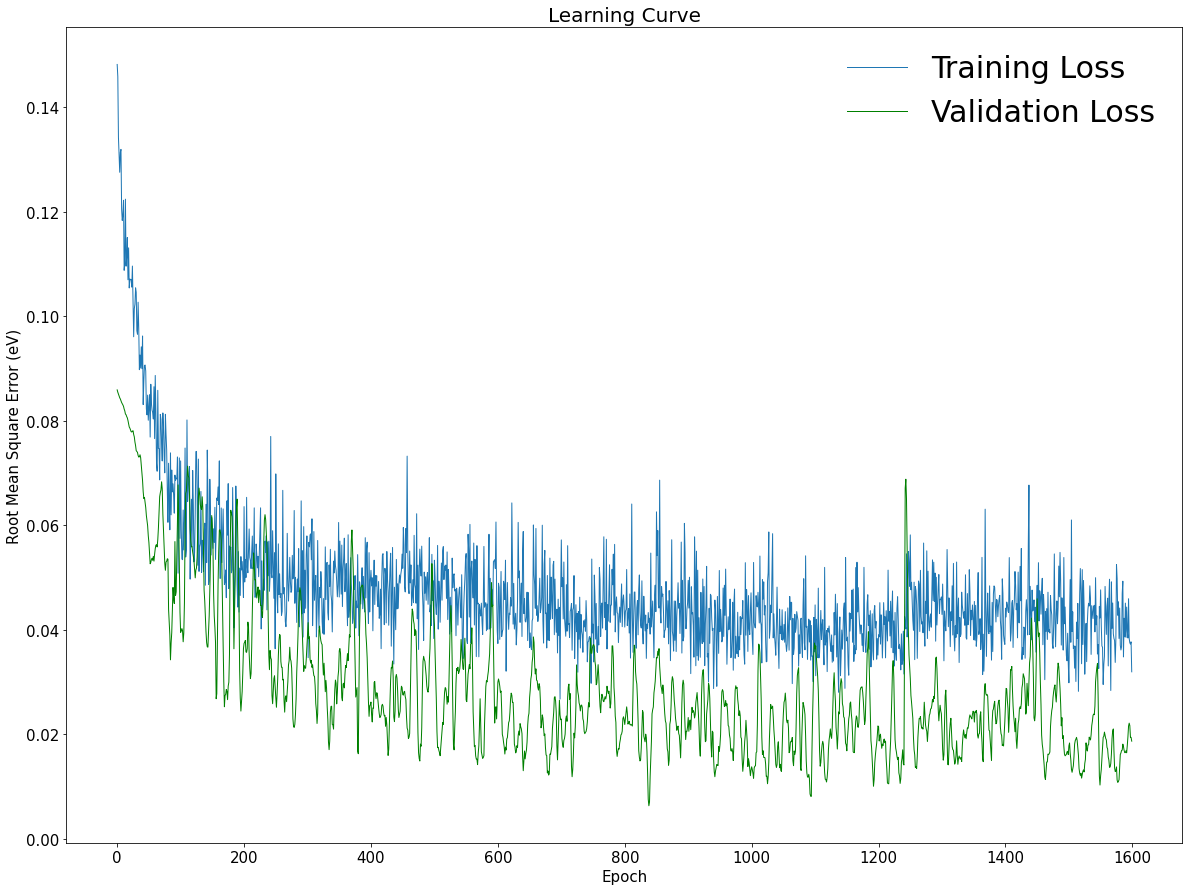

In [76]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [77]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [78]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.085, -0.055, name, fontsize=18)
            ax[0, i].text(0.085, -0.085, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(0.085, -0.115, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(0.085, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.085, -0.055, name, fontsize=18)
            ax[1, i - 4].text(0.085, -0.085, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(0.085, -0.115, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(0.085, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

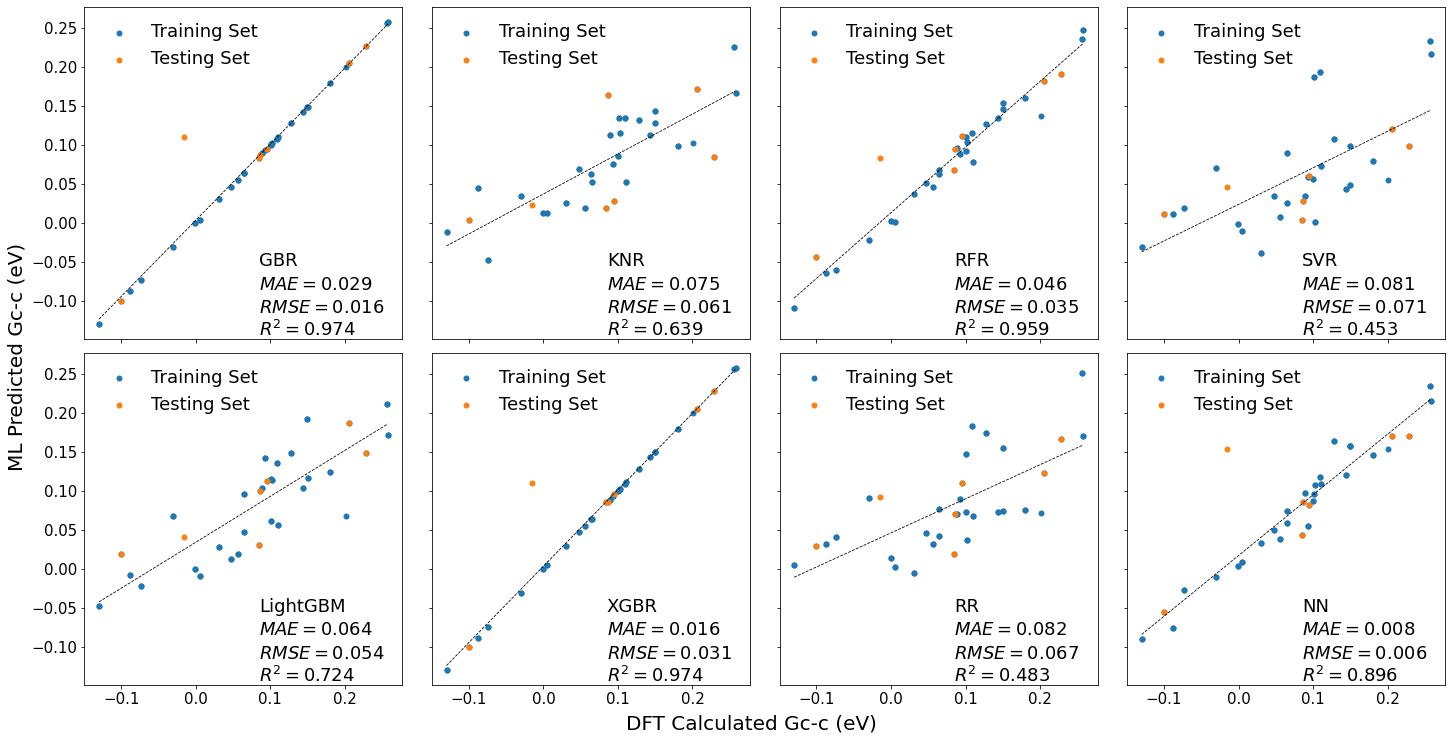

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [80]:
prediction_df = pd.read_csv('CO Dimerization Full Data (with I).csv')

In [81]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [82]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,28.15,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,26.42,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,24.40,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,20.91,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,27.87,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,23.42,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,22.26,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN


In [83]:
# Savings the Gco column
targets = prediction_df['G_C2O2 - Gco']

In [84]:
diff = prediction_df.columns.difference(test_data.columns)

In [85]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [86]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average VdW Radius', 'Average num of Valence Electron',
       'PE 1 minus PE 2', 'Covalent Radius 1 minus Covalent Radius 2',
       'FIE 1 minus FIE 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2'],
      dtype='object')

In [87]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average VdW Radius', 'Average num of Valence Electron',
       'PE 1 minus PE 2', 'Covalent Radius 1 minus Covalent Radius 2',
       'FIE 1 minus FIE 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2', 'G_C2O2 - Gco'],
      dtype='object')

In [88]:
def scaler(df):
    
    base = pd.read_csv('CO Dimerization Full Data (with I).csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_C2O2 - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_C2O2 - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


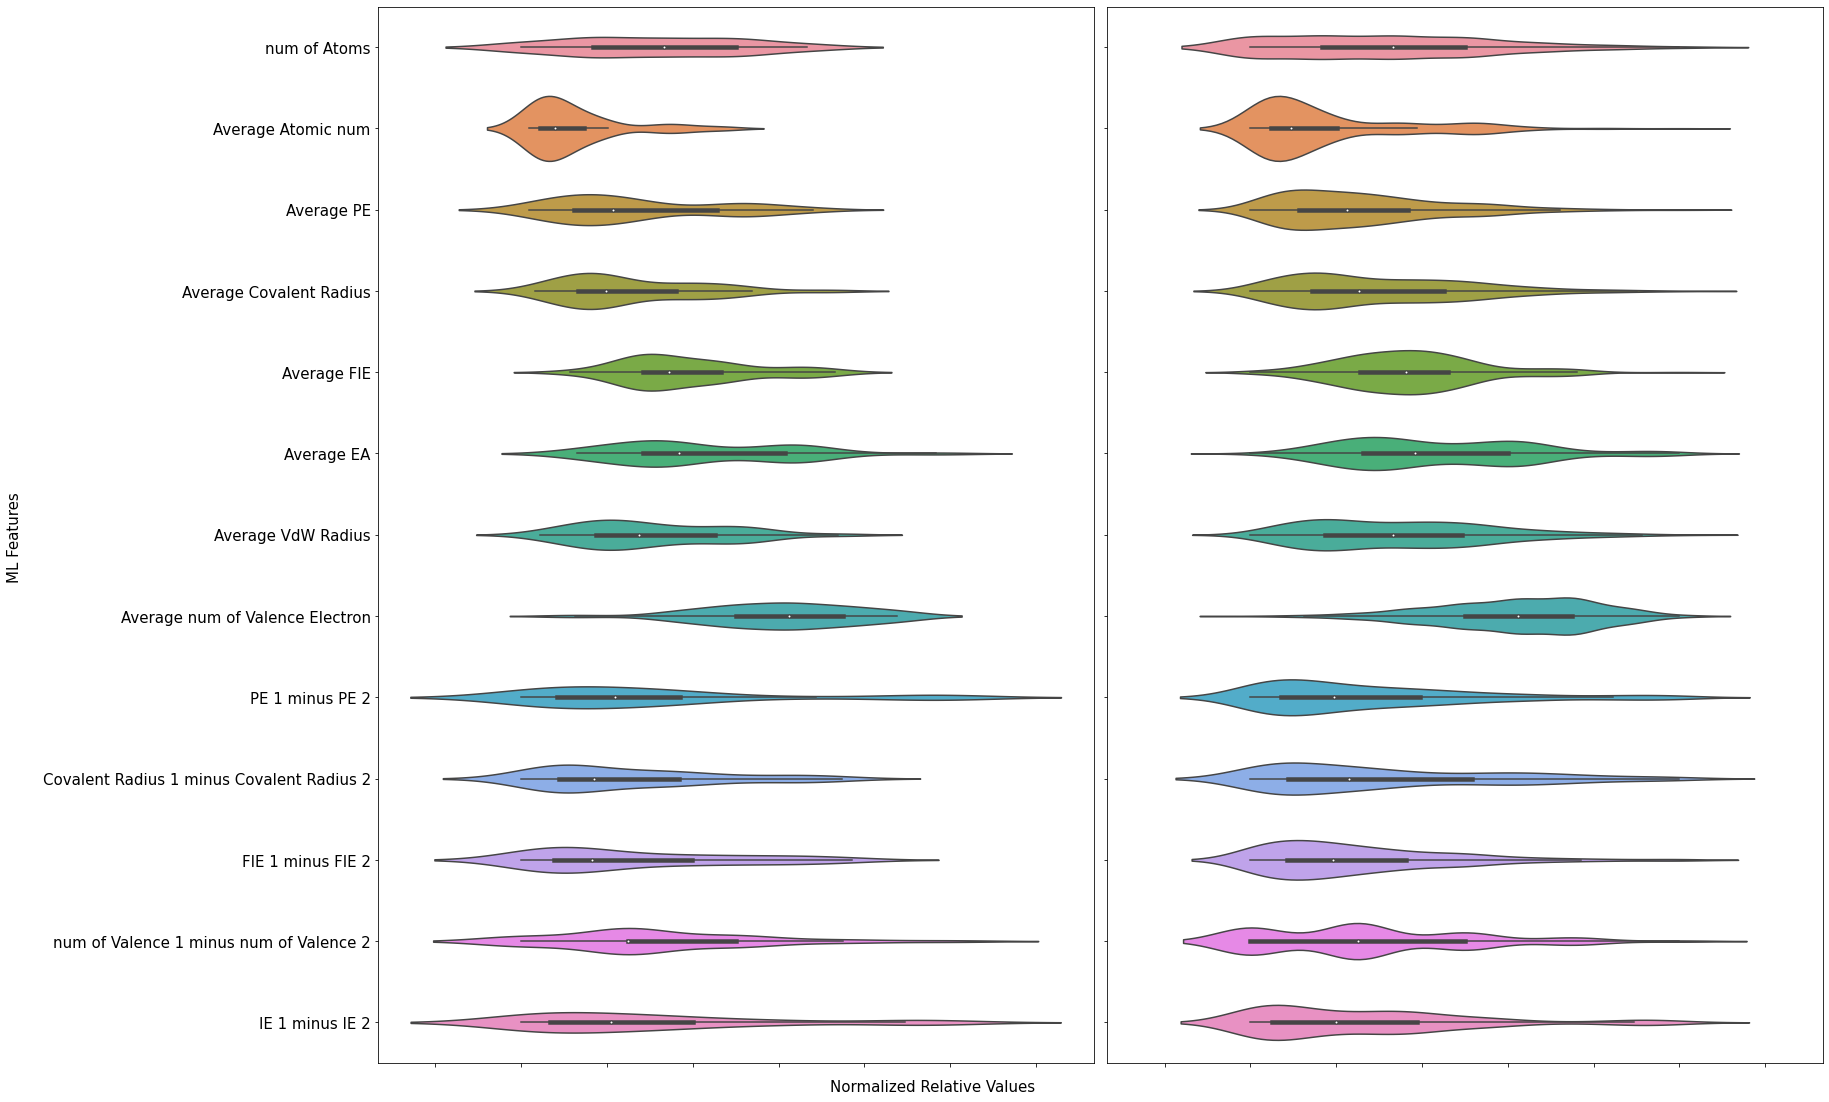

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [90]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [91]:
# Adding the Gco column back
prediction_df['G_C2O2 - Gco'] = targets

In [92]:
def ml_predict(dataframe, name, reg):
    dataframe['Gc-c_ML'] = np.nan
    for i, col in enumerate(dataframe['Gc-c_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Gc-c_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Gc-c_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [93]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco
0,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526
1,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446
2,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN
3,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN
4,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN


In [94]:
ml_predict(prediction_df, 'G_C2O2 - Gco' ,xgbr_optimized)

In [95]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526,0.109716,-0.015260
1,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446,0.064174,0.064460
2,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN,-0.079380,-0.079380
3,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN,0.005067,0.005067
4,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN,0.147029,0.147029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN,0.277196,0.277196
285,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN,0.332146,0.332146
286,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN,0.306691,0.306691
287,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN,0.262883,0.262883


In [96]:
b = np.sqrt(((prediction_df['G_C2O2 - Gco'] - prediction_df['Gc-c_ML'])**2).mean()).round(4)

In [97]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0308
Testing RMSE: 0.0156


In [98]:
prediction_df['Gc-c_Final'].describe()

count    289.000000
mean       0.109691
std        0.096457
min       -0.130060
25%        0.047891
50%        0.103924
75%        0.177311
max        0.332146
Name: Gc-c_Final, dtype: float64

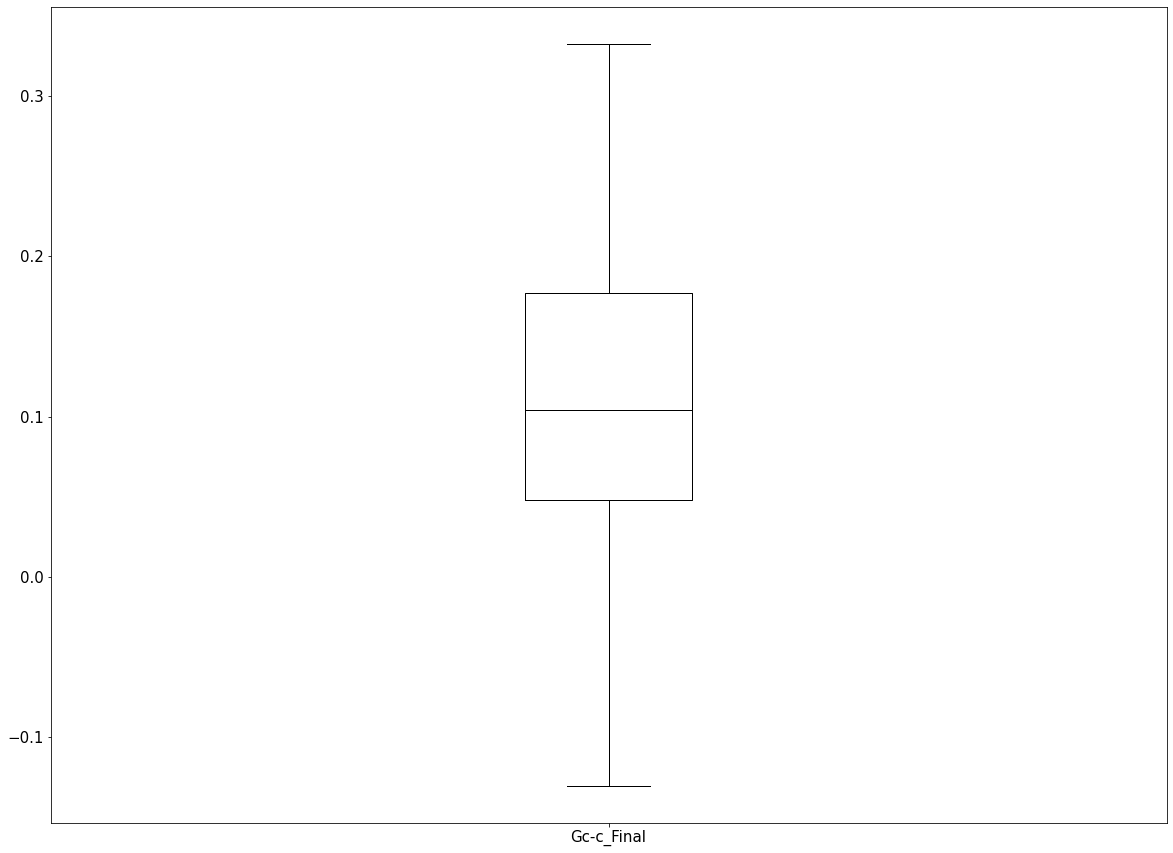

In [99]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gc-c_Final', grid=False, figsize=(20, 15));

In [100]:
final = adsorbates.join(prediction_df, how = 'left')

In [101]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526,0.109716,-0.015260
1,O,OH,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446,0.064174,0.064460
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN,-0.079380,-0.079380
3,O,NH,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN,0.005067,0.005067
4,O,NH2,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN,0.147029,0.147029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN,0.277196,0.277196
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN,0.332146,0.332146
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN,0.306691,0.306691
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN,0.262883,0.262883


In [102]:
# Save the predicted dataframe
final.to_csv('predicted_Gc-c_xgbr.csv')

# 8. delta_Gco Heat Map

In [103]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Gc-c_Final']

In [104]:
binding_energy

0     -0.015260
1      0.064460
2     -0.079380
3      0.005067
4      0.147029
         ...   
284    0.277196
285    0.332146
286    0.306691
287    0.262883
288    0.130420
Name: Gc-c_Final, Length: 289, dtype: float64

In [105]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [106]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [107]:
twoD

[[-0.01526,
  0.06446,
  -0.07937998324632645,
  0.005066771060228348,
  0.1470291167497635,
  0.05991678312420845,
  0.04210016131401062,
  -0.06055188924074173,
  0.049285195767879486,
  0.04287232458591461,
  0.10693054646253586,
  0.04205792769789696,
  -0.02657344751060009,
  0.1039239764213562,
  0.14972,
  0.23055173456668854,
  0.2997737526893616],
 [0.06446,
  0.20088,
  0.017780520021915436,
  0.014768288470804691,
  -0.06585917621850967,
  -0.10022,
  0.10244,
  0.00525,
  0.000882705906406045,
  0.02086658589541912,
  0.07778608053922653,
  0.07075207680463791,
  -0.07377,
  0.09512000000000001,
  0.17575451731681824,
  0.2446369230747223,
  0.2537853419780731],
 [-0.07937998324632645,
  0.017780520021915436,
  0.12853743135929108,
  0.025125732645392418,
  -0.010287546552717686,
  -0.025590356439352036,
  -0.13005999999999998,
  -0.014607248827815056,
  -0.03691406175494194,
  0.030539999999999998,
  0.14989,
  -0.03437737748026848,
  -0.020228872075676918,
  0.05837055295

In [108]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Gc-c",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

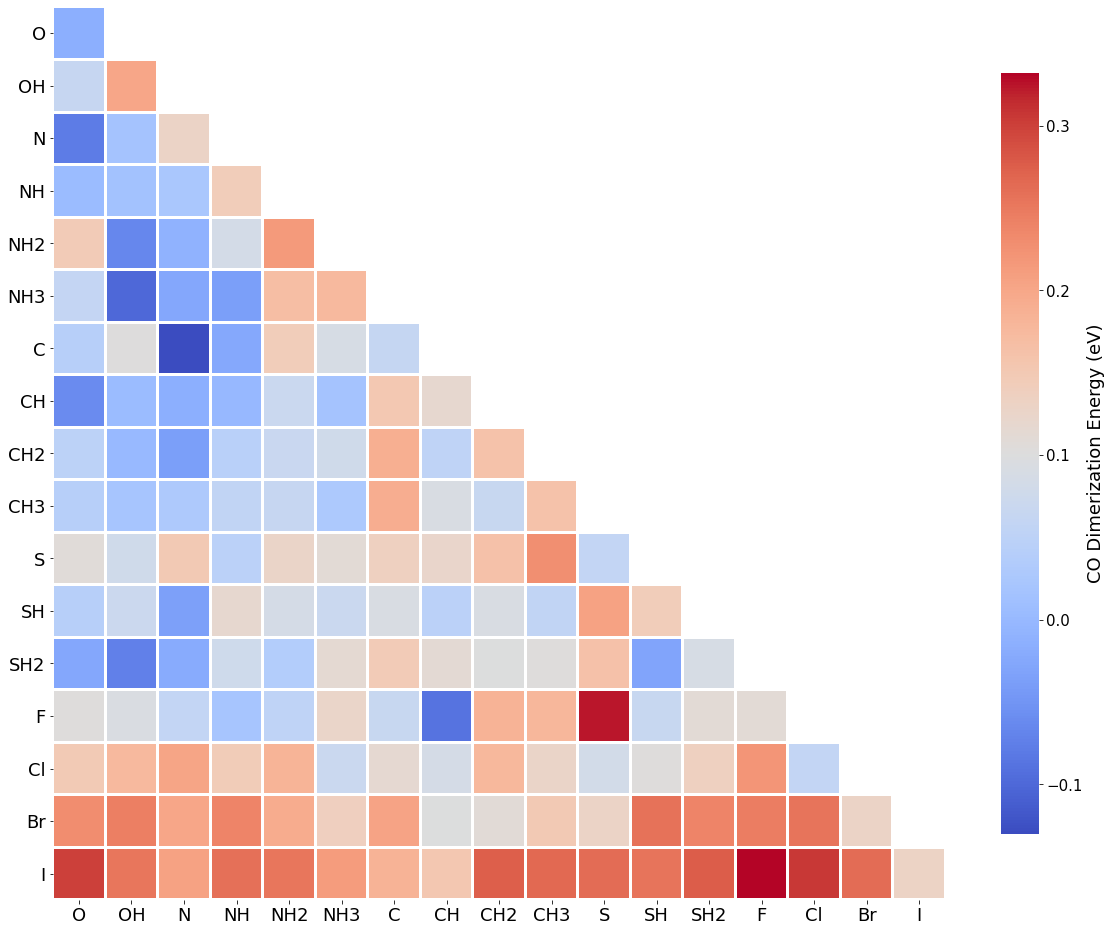

In [109]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'CO Dimerization Energy (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()